In [7]:
### Plots and analyses on co-eQTL results

# Libraries

In [8]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'"


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"


In [9]:
source('MS4_Plot_Config.r')

In [10]:
library('extrafont')

In [11]:
#font_import() 

In [12]:
#fonts()

# Parameters

In [13]:
### Which co-eQTL results (final-mapping: co_qtls_decision_tree; or initial mapping in evaluation phase: co_qtls_sceqtlgen )

In [14]:
coeqtl_results_path = 'co_qtls_decision_tree/'   # path to new results
coeqtl_results_path_old = 'co_qtls_sceqtlgen/'   # path to old results

In [15]:
### Path to the co-EQTL Files

In [16]:
data_path = '../data/current/coeqtl_mapping/'

In [ ]:
### Path to the eQTL files (sceQTLGen)

In [17]:
data_path_eqtl = '../data/current/eqtl_mapping/'

In [18]:
eqtl_results = 'sc_eqtlgen_final'

In [ ]:
### Pathfor saving of results

In [19]:
result_path = '../results/current/F3/'

In [20]:
result_path_analysis = paste0( "../data/current/coeqtl_mapping/", coeqtl_results_path , "analysis")
result_path_analysis_old = paste0( "../data/current/coeqtl_mapping/", coeqtl_results_path_old )

In [ ]:
### Path to meta-data files

In [23]:
data_path_meta = '../data/current/meta-data'

In [ ]:
### path to summary stats of single datasets

In [29]:

result_path_summary = '../data/current/summary_stats/'

In [ ]:
### Define how to do multiple testing correction

In [26]:
p_val_column = 'p_val_mt_eGene' # p_value # nominal , #p_val_mt_eGene
mt_method = 'eGene_bf'

In [27]:
p_value_sign = 0.05

In [28]:
n_sample_filter = 133

In [30]:
## snp_filter 
snp_filter = ''

# Data

## Load information about tests per cell-type and dataset

In [31]:
paste0(data_path, coeqtl_results_path)

[1] "../data/current/coeqtl_mapping/co_qtls_decision_tree/"

In [ ]:
### Load test info for meta analysis

In [32]:
test_info_meta = data.frame()

In [33]:
dataset = 'meta_analysis/meta_5ds/'
cell_types = c('CD4_T', 'CD8_T', 'NK', 'Mono', 'B')
file_name = 'Meta_Info_Tests_.csv'

In [34]:
for(i in cell_types){
    data = fread(paste0(data_path, coeqtl_results_path, dataset, i, '/',  file_name))
    data$cell_type = i
    test_info_meta = rbind(test_info_meta, data)
    }

In [35]:
head(test_info_meta,2)

V1,n_samples,is_rb_mt,amount_tests_datasets,cell_type
<int>,<int>,<int>,<int>,<chr>
1,15,0,6,CD4_T
2,16,0,57,CD4_T


In [36]:
test_info_meta %>% group_by(cell_type) %>% summarise(amount_tests = sum(amount_tests_datasets))

cell_type,amount_tests
<chr>,<int>
B,118308655
CD4_T,221277540
CD8_T,137443434
Mono,120499444
NK,119034938


In [37]:
test_info_meta %>% summarise(amount_tests = sum(amount_tests_datasets))

amount_tests
<int>
716564011


In [38]:
### Load Test Info single-datasets

In [39]:
test_info_ds = data.frame()

In [40]:
### For meta-analysis
datasets = c('Franke_v2', 'Franke_v3', 'wijst', 'multiome', 'oneK1K')
cell_types = c('CD4_T', 'CD8_T', 'NK', 'Mono', 'B')
file_name = 'F3_1_1_Meta_Info_Tests.csv'

In [41]:
for(j in datasets){
    for(i in cell_types){
        data = fread(paste0(data_path, coeqtl_results_path, 'analysis_', j,  '/', i, '/',  file_name))
        data$cell_type = i
        data$dataset = j
        test_info_ds  = rbind(test_info_ds , data)
        }
    }

In [42]:
head(test_info_ds,2)

V1,dataset,cell_type,n_samples,is_rb_mt,amount_tests_datasets
<int>,<chr>,<chr>,<int>,<int>,<int>
1,Franke_v2,CD4_T,20,0,8157
2,Franke_v2,CD4_T,20,1,3369


In [43]:
test_info_ds %>% group_by(cell_type, dataset) %>% summarise(amount_tests = sum(amount_tests_datasets))

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


cell_type,dataset,amount_tests
<chr>,<chr>,<int>
B,Franke_v2,955595
B,Franke_v3,2021510
B,multiome,65109774
B,oneK1K,112685242
B,wijst,508668
CD4_T,Franke_v2,49706609
CD4_T,Franke_v3,107832310
CD4_T,multiome,82518377
CD4_T,oneK1K,150181698


In [44]:
test_info_ds  %>% summarise(amount_tests = sum(amount_tests_datasets))

amount_tests
<int>
1276364763


## Information about sample-sizes and number of cells in each dataset

In [ ]:
### Load summary statistics with info about sample and cell numbers in datasets

In [45]:
datasets = c('Franke_split_v2', 'Franke_split_v3', 'wijst2018', 'multiome', 'oneK1k')

In [46]:
cell_types = c('CD4_T', 'CD8_T', 'NK', 'Mono', 'B')

In [47]:
sample_summary_stats = data.frame()

In [48]:
for(i in datasets){
    for (j  in cell_types){
        data = fread(paste0(result_path_summary , 'D1_Sample_summarywg3_', i, j ,'.Qced.Normalized.SCs.Rds.csv'))
        data$cell_type = j
        data$dataset = i
        
        sample_summary_stats = rbind(sample_summary_stats, data)
        }
    }

In [49]:
head(sample_summary_stats,2)

V1,Assignment,amount_cells,dataset,cell_type
<int>,<chr>,<int>,<chr>,<chr>
1,LL000086,460,Franke_split_v2,CD4_T
2,LL000694,356,Franke_split_v2,CD4_T


In [50]:
sum(sample_summary_stats$amount_cells)

[1] 1971801

In [51]:
sample_summary_stats_ind = sample_summary_stats

In [52]:
### Aggregate per cell-type and dataset

In [53]:
sample_summary_stats = sample_summary_stats %>% group_by(dataset, cell_type) %>% summarise(mean_amount_cells = mean(amount_cells),
                                                                                           sum_amount_cells = sum(amount_cells),
                                                                                           sd_amount_cells = sd(amount_cells),
                                                                    amount_individuals = length(unique(Assignment)))

`summarise()` has grouped output by 'dataset'. You can override using the
`.groups` argument.


In [54]:
sample_summary_stats$dataset = str_replace(sample_summary_stats$dataset, 'Franke_split_v2', 'Franke_v2')
sample_summary_stats$dataset = str_replace(sample_summary_stats$dataset, 'Franke_split_v3', 'Franke_v3')
sample_summary_stats$dataset = str_replace(sample_summary_stats$dataset, 'wijst2018', 'wijst')
sample_summary_stats$dataset = str_replace(sample_summary_stats$dataset, 'oneK1k', 'oneK1K')

In [55]:
### Across cell-types take max amount individuals
sample_summary_stats  =sample_summary_stats %>% group_by(dataset) %>% mutate(amount_individuals = max(amount_individuals))

In [56]:
head(sample_summary_stats ,2)

dataset,cell_type,mean_amount_cells,sum_amount_cells,sd_amount_cells,amount_individuals
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>
Franke_v2,B,18.1500,1815,13.90761,101
Franke_v2,CD4_T,371.4653,37518,180.88541,101


In [57]:
### replace info about amount of individuals for multiome (not correct because of duplicates)
sample_summary_stats$amount_individuals[sample_summary_stats$dataset == 'multiome'] = 123

In [58]:
### Add information for meta-analysis

In [59]:
meta_analysis_add =  sample_summary_stats %>% group_by(cell_type) %>% summarise(amount_individuals = sum(amount_individuals),
                                                                                sum_amount_cells = sum(sum_amount_cells),
                                                                                sd_amount_cells = mean(sd_amount_cells),
                                                                                mean_amount_cells = mean(mean_amount_cells))

In [60]:
meta_analysis_add$dataset = 'meta_analysis'

In [61]:
sample_summary_stats = rbind(sample_summary_stats, meta_analysis_add)

In [62]:
#sample_summary_stats 

In [63]:
sample_summary_stats

dataset,cell_type,mean_amount_cells,sum_amount_cells,sd_amount_cells,amount_individuals
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
Franke_v2,B,18.15000,1815,13.907614,101
Franke_v2,CD4_T,371.46535,37518,180.885409,101
Franke_v2,CD8_T,104.92000,10492,66.453854,101
Franke_v2,Mono,116.85000,11685,73.368914,101
Franke_v2,NK,61.29897,5946,52.530976,101
Franke_v3,B,31.82051,1241,27.109788,47
Franke_v3,CD4_T,357.65957,16810,181.839666,47
Franke_v3,CD8_T,131.42553,6177,62.140005,47
Franke_v3,Mono,120.06383,5643,88.245065,47


In [64]:
### Save the datasets info
write.csv(sample_summary_stats, paste0('figures/F9/Dataset_Cells_Overview.csv'))

## Load the performed tests for all significant triplets in different datasets and cell-types

In [65]:
## Testing results from single datasets

In [66]:
path = paste0(data_path , coeqtl_results_path  , '/tests_sign_pairs/Tests_executed_on_sign_gene_pairs', n_sample_filter,mt_method,  '_.csv')
tests_on_results = fread(path)
file.info(path)$ctime

[1] "2025-03-19 17:00:57 CET"

In [68]:
tests_on_results$triplet = paste0(tests_on_results$snp_id, ';' , tests_on_results$feature_id)

In [69]:
head(tests_on_results,2)

V1,Unnamed: 0,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,⋯,snp_position,closeGenes,z_score,triplet,n_samples,n_e_samples,gene1,gene2,dataset,cell_type
<int>,<int>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<int>,<int>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
0,42372,A1BG_RPS26,12:55975722:A:G,0.3972076,NA,NA,NA,12,56041351,⋯,55975722,FALSE,-0.846981,12:55975722:A:G;A1BG_RPS26,992,992,RPS26,A1BG,oneK1K,CD4_T
1,42373,A1BG_RPS26,12:55991020:G:A,0.5060044,NA,NA,NA,12,56041351,⋯,55991020,FALSE,-0.665311,12:55991020:G:A;A1BG_RPS26,992,992,RPS26,A1BG,oneK1K,CD4_T


In [70]:
unique(tests_on_results$dataset)

[1] "oneK1K"    "Franke_v2" "Franke_v3" "wijst"     "multiome"

In [72]:
## Testing results from meta-analysis

In [73]:
path = paste0(data_path , coeqtl_results_path  , '/tests_sign_pairs/Tests_executed_on_sign_gene_pairs_meta', n_sample_filter, '.csv')
tests_on_results_meta = fread(path)
file.info(path)$ctime

[1] "2025-02-26 11:17:27 CET"

In [75]:
tests_on_results_meta$triplet = paste0(tests_on_results_meta$snp_id, ';' , tests_on_results_meta$feature_id)

In [76]:
head(tests_on_results_meta,2)

V1,coQTL,eGene,feature_chromosome,feature_start,feature_end,coeGene,feature_id,snp_id,snp_position,⋯,z_score;Wijst,n_samples;Multiome,n_e_samples;Multiome,z_score;Multiome,n_samples;oneK1K,n_e_samples;oneK1K,z_score;oneK1K,dataset,cell_type,triplet
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,12:55991020:G:A;RPS26_EEF1A1,RPS26,12,56041351,56044676,EEF1A1,EEF1A1_RPS26,12:55991020:G:A,55991020,⋯,-8.399514,121,121,-9.171205,1014,1014,-41.02567,meta_analysis,CD4_T,12:55991020:G:A;EEF1A1_RPS26
1,12:55991020:G:A;RPS26_RPL10,RPS26,12,56041351,56044676,RPL10,RPL10_RPS26,12:55991020:G:A,55991020,⋯,-8.057972,121,121,-8.469697,1014,1014,-42.87260,meta_analysis,CD4_T,12:55991020:G:A;RPL10_RPS26


## Sign co-eQTLs from meta-analysis

In [1]:
### Load the significant co-eQTLs from the meta-analysis (annoteted - see 00 script)

In [77]:
path = paste0( "../data/current/coeqtl_mapping/", coeqtl_results_path , "/shared_results/", '5DS_Meta_Analysis_Sign_coeQTLs', n_sample_filter, p_val_column  ,'_.csv')
meta_results = fread(path)
file.info(path)$ctime

[1] "2025-07-20 12:14:08 CEST"

In [78]:
length(unique(meta_results$triplet))

[1] 64233

In [79]:
nrow(meta_results)

[1] 91628

In [82]:
meta_results = as.data.frame(meta_results)

In [83]:
min(meta_results$n_samples)

[1] 134

In [84]:
head(meta_results,2)

,V1,eGene,coeGene,snp_id,cell_type,feature_id,triplet,n_samples,p_value,z_score,⋯,eQTL_remap2022_1,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl,simulation_score,ccInteraction
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<int>
1,1,A2M,BACH2,12:8971336:T:C,CD4_T,A2M_BACH2,12:8971336:T:C;A2M_BACH2,977,2.687871e-11,-6.662730,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0
2,2,A2M,BACH2,12:8992460:T:C,CD4_T,A2M_BACH2,12:8992460:T:C;A2M_BACH2,977,1.680350e-10,-6.388031,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0


In [ ]:
### Summarise information about significant triplets, gene-pairs, eGenes, ...

In [87]:
meta_summary = meta_results %>% group_by(cell_type) %>% summarise(amount_coeqtls = n(),
                                                            amount_coeqtls_unique = length(unique(triplet[type == 'unique'])),
                                                            amount_coeqtls_n_rb_mt = length(unique(triplet[(eGene_rib == FALSE) & (coeGene_rib == FALSE) & (eGene_mt == FALSE) & (coeGene_mt == FALSE)])),
                                        
                                                                           
                                                            
                                                            amount_gene_pairs = length(unique(feature_id)),
                                                            amount_gene_pairs_unique = length(unique(feature_id[type == 'unique'])),
                                                            amount_gene_pairs_unique_n_rb_mt = length(unique(feature_id[(eGene_rib == FALSE) & (coeGene_rib == FALSE) & (eGene_mt == FALSE) & (coeGene_mt == FALSE) & (type == 'unique')])),
                                            
                                                            
                                                            amount_eGenes_unique = length(unique(eGene[type == 'unique'])),
                                                            amount_eGenes_unique_n_rb_mt = length(unique(eGene[(type== 'unique') & (eGene_rib == FALSE) & (coeGene_rib == FALSE)  & (eGene_mt == FALSE) & (coeGene_mt == FALSE)])),
                                                           
                                                            amount_eGenes_gwas = length(unique(eGene[(type== 'unique') & (eqtl_snp == FALSE) & (!eGene %in% eGene[eqtl_snp == TRUE])]))
                                                           
                                                           
                                                           )

In [ ]:
### Overview significan results

In [88]:
meta_summary %>% arrange(cell_type)

cell_type,amount_coeqtls,amount_coeqtls_unique,amount_coeqtls_n_rb_mt,amount_gene_pairs,amount_gene_pairs_unique,amount_gene_pairs_unique_n_rb_mt,amount_eGenes_unique,amount_eGenes_unique_n_rb_mt,amount_eGenes_gwas
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B,7291,7108,381,879,867,144,42,33,5
CD4_T,49847,49754,3674,8582,8567,2488,168,132,11
CD8_T,25335,25329,1354,4294,4291,1020,82,66,3
Mono,4319,4292,995,1608,1599,717,62,48,8
NK,4836,4826,397,805,800,293,44,38,2


## Sign co-eQTLs from single datasets

In [2]:
## Get significant co-eQTLs from co-eQTL mapping in single datasets

In [91]:
path = paste0( "../data/current/coeqtl_mapping/", coeqtl_results_path , "/shared_results/", 'DS_Sign_coeQTLs', n_sample_filter,p_val_column  ,'_.csv')
coeqtl_results = fread(path)
file.info(path)$ctime

[1] "2025-07-20 12:14:10 CEST"

In [92]:
head(coeqtl_results,2)

V1,eGene,coeGene,snp_id,dataset,cell_type,triplet,feature_id,n_samples,p_val_mt,⋯,eGene_mean_amount_cells,eGene_mean_expression,eGene_mean_percentage_zero,eGene_mean_non_zero_counts,coeGene_amount_samples_non_zero,coeGene_mean_amount_cells,coeGene_mean_expression,coeGene_mean_percentage_zero,coeGene_mean_non_zero_counts,remap_overlap_tf_snp
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A2M,BACH2,12:8971336:T:C,oneK1K,CD4_T,12:8971336:T:C;A2M_BACH2,A2M_BACH2,855,0.0795440,⋯,494.7441,0.06395932,94.40685,26.23128,1017,472.9774,1.45206,39.81886,290.2085,NA
2,A2M,BACH2,12:8992460:T:C,oneK1K,CD4_T,12:8992460:T:C;A2M_BACH2,A2M_BACH2,855,0.4565702,⋯,494.7441,0.06395932,94.40685,26.23128,1017,472.9774,1.45206,39.81886,290.2085,NA


In [93]:
unique(coeqtl_results$dataset)

[1] "oneK1K"

In [94]:
min(coeqtl_results$n_samples)

[1] 106

In [95]:
### Summarize number of triplets, gene-pairs etc. per dataset and cell-type

In [98]:
coeqtl_summary = coeqtl_results %>% group_by(cell_type, dataset) %>% summarise(amount_coeqtls = n(),
                                                            amount_coeqtls_unique = length(unique(triplet[type == 'unique'])),
                                                            amount_coeqtls_n_rb_mt = length(unique(triplet[(eGene_rib == FALSE) & (eGene_mt == FALSE) &  (coeGene_rib == FALSE)  & (coeGene_mt == FALSE) & (type == 'unique')])),
                                                            
                                                            amount_gene_pairs = length(unique(feature_id)),
                                                            amount_gene_pairs_unique = length(unique(feature_id[type == 'unique'])),
                                                            amount_gene_pairs_unique_n_rb_mt = length(unique(feature_id[(eGene_rib == FALSE)  & (eGene_mt == FALSE) & (coeGene_rib == FALSE)  & (coeGene_mt == FALSE)  & (type == 'unique')])),
                                                            
                                                            amount_eGenes_unique = length(unique(eGene[type == 'unique'])),
                                                            amount_eGenes_unique_n_rb_mt = length(unique(eGene[(type== 'unique') & (eGene_rib == FALSE)   & (eGene_mt == FALSE) & (coeGene_rib == FALSE) & (coeGene_mt == FALSE)])),
                                                            amount_eGenes_gwas = length(unique(eGene[(type== 'unique') & (eqtl_snp == FALSE) & (!eGene %in% eGene[eqtl_snp == TRUE])])))

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [99]:
coeqtl_summary  %>% arrange(dataset, cell_type)

cell_type,dataset,amount_coeqtls,amount_coeqtls_unique,amount_coeqtls_n_rb_mt,amount_gene_pairs,amount_gene_pairs_unique,amount_gene_pairs_unique_n_rb_mt,amount_eGenes_unique,amount_eGenes_unique_n_rb_mt,amount_eGenes_gwas
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B,oneK1K,7522,7387,303,863,853,117,43,31,4
CD4_T,oneK1K,48333,48246,3459,8163,8149,2286,153,124,7
CD8_T,oneK1K,25133,25125,1249,4221,4219,977,70,55,3
Mono,oneK1K,3368,3356,563,1142,1136,412,33,28,5
NK,oneK1K,4770,4761,349,757,753,250,36,30,2


## Tested eGenes and coeGenes in different cell-types and datasets

In [100]:
only_dt = TRUE  # define whether to filter on only eGenes passing decision tree filter or not

In [101]:
### Get tested eGenes and SNPs per cell-type  (from sceQTLGen=

In [102]:
snp_gene_mapping_all = data.frame()

In [103]:
cell_types = c('B', 'CD4_T', 'CD8_T', 'NK', 'Mono')

In [104]:
data_path_eqtl

[1] "../data/current/eqtl_mapping/"

In [105]:
for(i in cell_types){
    snp_gene_mapping = read.csv(paste0(data_path_eqtl, 'sc_eqtlgen_final/'  , i, '_snp_egene_mapping.csv'))
    snp_gene_mapping$cell_type = i
    
    snp_gene_mapping_all = rbind(snp_gene_mapping, snp_gene_mapping_all)
    }
    

In [106]:
head(snp_gene_mapping_all,2)

,X,feature_id,snp_id,feature_start,feature_end,p_value,beta,cell_type
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,CD52,1:26306290:C:T,26317957,26320523,1.903053e-214,-1.0420481,Mono
2,2,CD52,1:26358699:C:T,26317957,26320523,2.438329e-19,0.3022236,Mono


In [107]:
## Load genes passing decision tree filter in the different datasets

In [108]:
cell_types = c( 'B', 'NK', 'Mono', 'CD8_T' , 'CD4_T')

In [109]:
gene_list = data.frame()

In [110]:
datasets_to_load = c('Franke_v2', 'Franke_v3', 'wijst', 'oneK1K', 'multiome')

In [111]:
for(j in datasets_to_load){
    for(i in cell_types){
        gene_list_input = fread(paste0(data_path, coeqtl_results_path , '/correlation_input/', 'F11_Decision_Tree_Geneswg3_',j,'_' , i, '.Qced.Normalized.SCs.Rds.tsv'), header = FALSE)
        gene_list_input$cell_type = i
        gene_list_input$dataset = j
        gene_list = rbind(gene_list, gene_list_input)
        }
    }

In [113]:
### unique gene list per cell-type

In [114]:
 gene_list= unique( gene_list[,c('cell_type', 'V1')])

In [115]:
head( gene_list,2)

cell_type,V1
<chr>,<chr>
B,x
B,AC004687.1


In [116]:
colnames( gene_list) = c('cell_type', 'gene')

In [117]:
### Filter input eGenes on only genes passing decision tree filter

In [118]:
head(snp_gene_mapping_all,2)

,X,feature_id,snp_id,feature_start,feature_end,p_value,beta,cell_type
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,CD52,1:26306290:C:T,26317957,26320523,1.903053e-214,-1.0420481,Mono
2,2,CD52,1:26358699:C:T,26317957,26320523,2.438329e-19,0.3022236,Mono


In [119]:
snp_gene_mapping_all %>% group_by(cell_type) %>% summarise(egenes = length(unique(feature_id)))

cell_type,egenes
<chr>,<int>
B,2017
CD4_T,4988
CD8_T,2392
Mono,2029
NK,2170


In [120]:
#snp_gene_mapping_all[snp_gene_mapping_all$feature_id == 'AP1S3',]

In [121]:
only_dt

[1] TRUE

In [122]:
if(only_dt == TRUE){
snp_gene_mapping = merge(snp_gene_mapping_all, gene_list, by.x = c('feature_id', 'cell_type'),
                             by.y = c('gene', 'cell_type'))
    }

In [123]:
head(snp_gene_mapping,2)

,feature_id,cell_type,X,snp_id,feature_start,feature_end,p_value,beta
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,A1BG,B,1348,19:58406208:G:A,58345178,58353499,4.333125e-07,-0.1954896
2,A1BG,CD4_T,3178,19:58497199:G:A,58345178,58353499,2.302583e-13,-0.2558016


In [124]:
snp_gene_mapping %>% group_by(cell_type) %>% summarise(egenes = length(unique(feature_id)))

cell_type,egenes
<chr>,<int>
B,1695
CD4_T,3687
CD8_T,2031
Mono,1759
NK,1928


# Analyze & Plot Data

## Fig. 3: BarPlots visualizing tested vs. signifant eGenes / gene-pairs / triplets

### eGenes

In [131]:
## Get the number of cell-types in which a eGene was tested vs. had an eQTL effect

In [132]:
version = 'v1'

In [ ]:
## Testing of eGenes

In [133]:
if(version == 'v1'){   
    amount_ct_tested = snp_gene_mapping %>% group_by(feature_id) %>% summarise(amount_cts_test = length(unique(cell_type)))
    } 

In [134]:
head(amount_ct_tested,2)

feature_id,amount_cts_test
<chr>,<int>
A1BG,4
A2M,1


In [135]:
## Get the amount of cell-types in which a eGene had a co-eQTL effect

In [136]:
amount_ct_coeqtl= meta_results[meta_results$type == 'unique',] %>% group_by(eGene) %>% summarise(amount_cts_coeqtl = length(unique(cell_type)))

In [137]:
head(amount_ct_coeqtl,2)

eGene,amount_cts_coeqtl
<chr>,<int>
A2M,1
A2M-AS1,1


In [138]:
## Merge the information

In [139]:
if(version == 'v1'){
    ct_overlap_egenes  = merge(amount_ct_tested, amount_ct_coeqtl, by.x = 'feature_id', by.y = 'eGene')
    }

In [140]:
head(ct_overlap_egenes,2)

,feature_id,amount_cts_test,amount_cts_coeqtl
,<chr>,<int>,<int>
1,A2M,1,1
2,A2M-AS1,3,1


In [ ]:
ct_overlap_egenes[(ct_overlap_egenes$amount_cts_test == 5) & (ct_overlap_egenes$amount_cts_coeqtl == 5),]

,feature_id,amount_cts_test,amount_cts_coeqtl
,<chr>,<int>,<int>
83,EIF5A,5,5
125,HLA-DRB1,5,5
233,RPS26,5,5


In [142]:
## Aggregate information

In [143]:
ct_overlap_egenes_sum = ct_overlap_egenes %>%  group_by(amount_cts_test , amount_cts_coeqtl) %>% dplyr::count()

In [144]:
ct_overlap_egenes_sum

amount_cts_test,amount_cts_coeqtl,n
<int>,<int>,<int>
1,1,46
2,1,65
2,2,4
3,1,43
3,2,7
3,3,1
4,1,41
4,2,13
4,3,5


In [ ]:
### Plot

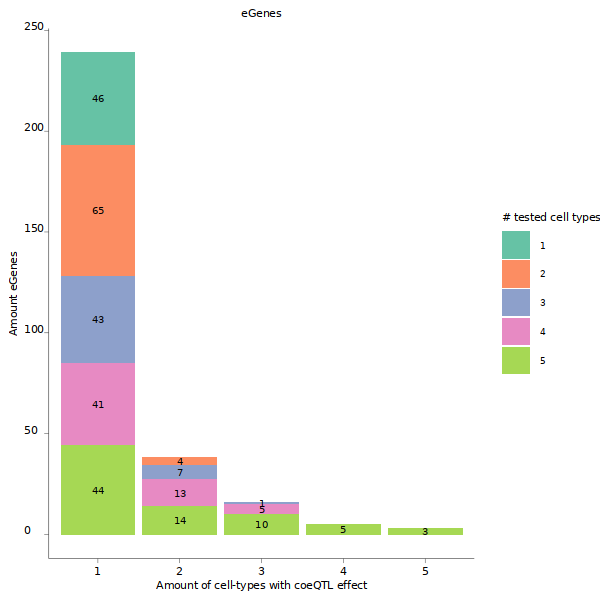

In [145]:
options(repr.plot.width=5, repr.plot.height=5)
ct_overlap_plot_egene = ggplot(ct_overlap_egenes_sum, aes(fill=as.character(amount_cts_test), y=as.character(amount_cts_coeqtl), x=n)) + 
    geom_bar(position="stack", stat="identity")  +  coord_flip() + plot_config + xlab('Amount eGenes') + ylab('Amount of cell-types with coeQTL effect') +
    scale_fill_brewer(name="# tested cell types", palette="Set2") + geom_text(aes(label=n), position=position_stack(vjust=0.5), size=2) + theme(  legend.title = element_text()) + ggtitle('eGenes')

ct_overlap_plot_egene

In [146]:
pdf(paste0('figures/F9/F9_CT_Overlap_Bar_Plot_eGene_' ,   n_sample_filter, '_', p_val_column , version,  '.pdf'), width =3, height =2.5)
print(ct_overlap_plot_egene )
dev.off()

pdf 
  2

In [147]:
### save the data for the plot
write.csv(ct_overlap_egenes_sum , paste0('figures/F9/F9_CT_Overlap_Bar_Plot_eGene_' ,   n_sample_filter, '_', p_val_column , '_data.csv'))

### coeGenes

In [149]:
head( gene_list,2)

cell_type,gene
<chr>,<chr>
B,x
B,AC004687.1


In [150]:
## Get the amount of cell-types in which a coeGene passed the decision tree filter

In [151]:
if(version == 'v1'){    
    amount_ct_tested = gene_list %>% group_by(gene) %>% summarise(amount_cts_test = length(unique(cell_type)))
    }

In [152]:
head(amount_ct_tested,2)

gene,amount_cts_test
<chr>,<int>
A1BG,5
A1BG-AS1,2


In [153]:
## Get the amount of cell-types in which a coeGene had a co-eQTL effect

In [154]:
amount_ct_coeqtl= meta_results[meta_results$type == 'unique',] %>% group_by(coeGene) %>% summarise(amount_cts_coeqtl = length(unique(cell_type)))

In [155]:
head(amount_ct_coeqtl,2)

coeGene,amount_cts_coeqtl
<chr>,<int>
A1BG,1
A2M,2


In [156]:
## Merge the information

In [157]:
if(version == 'v1'){
    ct_overlap_coegenes  = merge(amount_ct_tested, amount_ct_coeqtl, by.x = 'gene', by.y = 'coeGene')
    }
    

In [158]:
head(ct_overlap_coegenes,2)

,gene,amount_cts_test,amount_cts_coeqtl
,<chr>,<int>,<int>
1,A1BG,5,1
2,A2M,3,2


In [160]:
## Aggregate information

In [161]:
ct_overlap_coegenes_sum = ct_overlap_coegenes %>%  group_by(amount_cts_test , amount_cts_coeqtl) %>% dplyr::count()

In [162]:
ct_overlap_coegenes_sum 

amount_cts_test,amount_cts_coeqtl,n
<int>,<int>,<int>
1,1,89
2,1,123
2,2,32
3,1,115
3,2,46
3,3,7
4,1,206
4,2,91
4,3,18


In [ ]:
### Plot the information

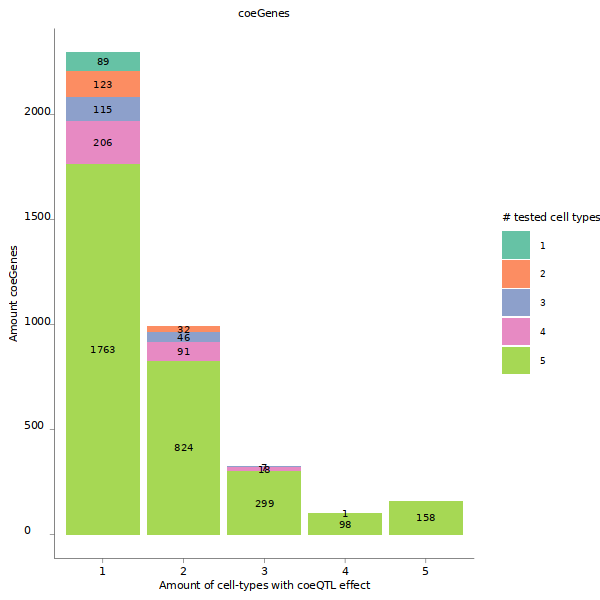

In [163]:
options(repr.plot.width=5, repr.plot.height=5)
ct_overlap_plot_coegene = ggplot(ct_overlap_coegenes_sum , aes(fill=as.character(amount_cts_test), y=as.character(amount_cts_coeqtl), x=n)) + 
    geom_bar(position="stack", stat="identity") + coord_flip() + plot_config + xlab('Amount coeGenes') + ylab('Amount of cell-types with coeQTL effect') +
    scale_fill_brewer(name="# tested cell types", palette="Set2") + geom_text(aes(label=n), position=position_stack(vjust=0.5), size=2)  + theme(  legend.title = element_text()) + ggtitle('coeGenes')

ct_overlap_plot_coegene

In [164]:
pdf(paste0('figures/F9/F9_CT_Overlap_Bar_Plot_coeGene_' ,   n_sample_filter, '_', p_val_column , version, '.pdf'), width =3, height =2.5)
print(ct_overlap_plot_coegene )
dev.off()

pdf 
  2

In [165]:
### save the data for the plot
write.csv(ct_overlap_coegenes_sum , paste0('figures/F9/F9_CT_Overlap_Bar_Plot_coeGene_' ,   n_sample_filter, '_', p_val_column ,version, '_data.csv'))

### Gene-Pairs

In [167]:
length(unique(tests_on_results_meta$feature_id))

[1] 13581

In [168]:
sum(unique(meta_results$feature_id[meta_results$type == 'unique']) %in% unique(tests_on_results_meta$feature_id)) # al included

[1] 12474

In [169]:
head(tests_on_results_meta,2)

V1,coQTL,eGene,feature_chromosome,feature_start,feature_end,coeGene,feature_id,snp_id,snp_position,⋯,z_score;Wijst,n_samples;Multiome,n_e_samples;Multiome,z_score;Multiome,n_samples;oneK1K,n_e_samples;oneK1K,z_score;oneK1K,dataset,cell_type,triplet
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,12:55991020:G:A;RPS26_EEF1A1,RPS26,12,56041351,56044676,EEF1A1,EEF1A1_RPS26,12:55991020:G:A,55991020,⋯,-8.399514,121,121,-9.171205,1014,1014,-41.02567,meta_analysis,CD4_T,12:55991020:G:A;EEF1A1_RPS26
1,12:55991020:G:A;RPS26_RPL10,RPS26,12,56041351,56044676,RPL10,RPL10_RPS26,12:55991020:G:A,55991020,⋯,-8.057972,121,121,-8.469697,1014,1014,-42.87260,meta_analysis,CD4_T,12:55991020:G:A;RPL10_RPS26


In [170]:
## Get the amount of cell-types in which a gene_pair was tested

In [171]:
amount_ct_tested = unique(tests_on_results_meta[,c('feature_id', 'cell_type')]) %>% group_by(feature_id) %>% summarise(amount_cts_test = length(unique(cell_type)))

In [172]:
head(amount_ct_tested,2)

feature_id,amount_cts_test
<chr>,<int>
A1BG_RPS26,5
A2M-AS1_EEF1A1,3


In [173]:
## Get the amount of cell-types in which a gene-pair had a co-eQTL effect

In [174]:
amount_ct_coeqtl= meta_results[meta_results$type == 'unique',] %>% group_by(feature_id) %>% summarise(amount_cts_coeqtl = length(unique(cell_type)))

In [175]:
head(amount_ct_coeqtl,2)

feature_id,amount_cts_coeqtl
<chr>,<int>
A1BG_RPS26,1
A2M-AS1_IL7R,1


In [176]:
## Merge the information

In [177]:
ct_overlap_coegenes  = merge(amount_ct_tested, amount_ct_coeqtl, by.x = 'feature_id', by.y = 'feature_id')

In [178]:
head(ct_overlap_coegenes,2)

,feature_id,amount_cts_test,amount_cts_coeqtl
,<chr>,<int>,<int>
1,A1BG_RPS26,5,1
2,A2M_BACH2,2,1


In [180]:
## Aggregate information

In [181]:
ct_overlap_coegenes_sum = ct_overlap_coegenes %>%  group_by(amount_cts_test , amount_cts_coeqtl) %>% dplyr::count()

In [182]:
ct_overlap_coegenes_sum 

amount_cts_test,amount_cts_coeqtl,n
<int>,<int>,<int>
1,1,791
2,1,980
2,2,43
3,1,1013
3,2,72
3,3,8
4,1,2164
4,2,348
4,3,19


In [3]:
### Plot

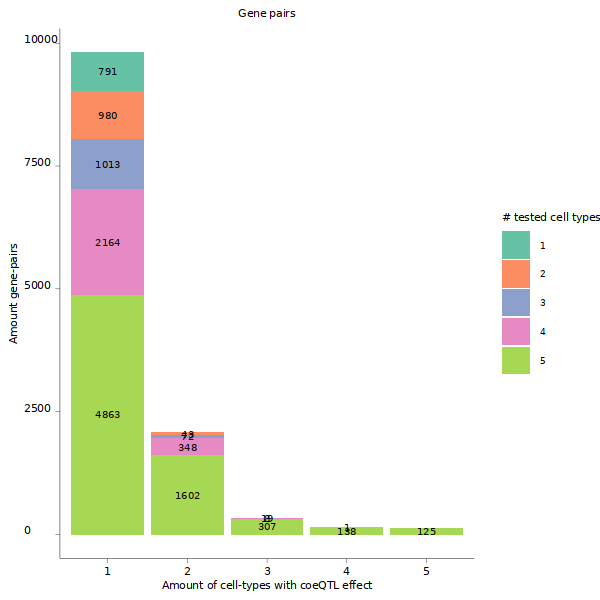

In [183]:
options(repr.plot.width=5, repr.plot.height=5)
ct_overlap_plot_coegene = ggplot(ct_overlap_coegenes_sum , aes(fill=as.character(amount_cts_test), y=as.character(amount_cts_coeqtl), x=n)) + 
    geom_bar(position="stack", stat="identity") + coord_flip() + plot_config + xlab('Amount gene-pairs') + ylab('Amount of cell-types with coeQTL effect') +
    scale_fill_brewer(name="# tested cell types", palette="Set2") + geom_text(aes(label=n), position=position_stack(vjust=0.5), size=2)  + theme(  legend.title = element_text()) + ggtitle('Gene pairs')

ct_overlap_plot_coegene

In [184]:
pdf(paste0('figures/F9/F9_CT_Overlap_Bar_Plot_gene_pair_' ,   n_sample_filter, '_', p_val_column , '.pdf'), width =3, height =2.5)
print(ct_overlap_plot_coegene )
dev.off()

pdf 
  2

In [185]:
### save the data for the plot
write.csv(ct_overlap_coegenes_sum , paste0('figures/F9/F9_CT_Overlap_Bar_Plot_gene_pair_' ,   n_sample_filter, '_', p_val_column , '_data.csv'))

## Suppl. Fig. Upset Plots: overlaps across cell-types (eGenes and coeGenes)

### Overlap of significant eGenes

In [329]:
tested_gene_pairs_list = list()

In [330]:
#head(meta_results,2)

In [331]:
for(i in unique(meta_results$cell_type)){
    data = meta_results[(meta_results$cell_type == i) & (meta_results$type == 'unique'),]
    gene_pair = unique(data$eGene)
    
    tested_gene_pairs_list[[paste0(unique(data$cell_type) )]] = gene_pair
    }

In [332]:
str( tested_gene_pairs_list)

List of 5
 $ Mono : chr [1:62] "ACSL5" "STK32C" "SFMBT2" "ADK" ...
 $ CD4_T: chr [1:168] "NMT2" "ANK3" "SAR1A" "PPA1" ...
 $ CD8_T: chr [1:82] "ANK3" "PPA1" "SAR1A" "WDR37" ...
 $ NK   : chr [1:44] "SAR1A" "CD3E" "IFITM1" "IFITM2" ...
 $ B    : chr [1:42] "TMEM123" "CORO1B" "RPS26" "IFNG-AS1" ...


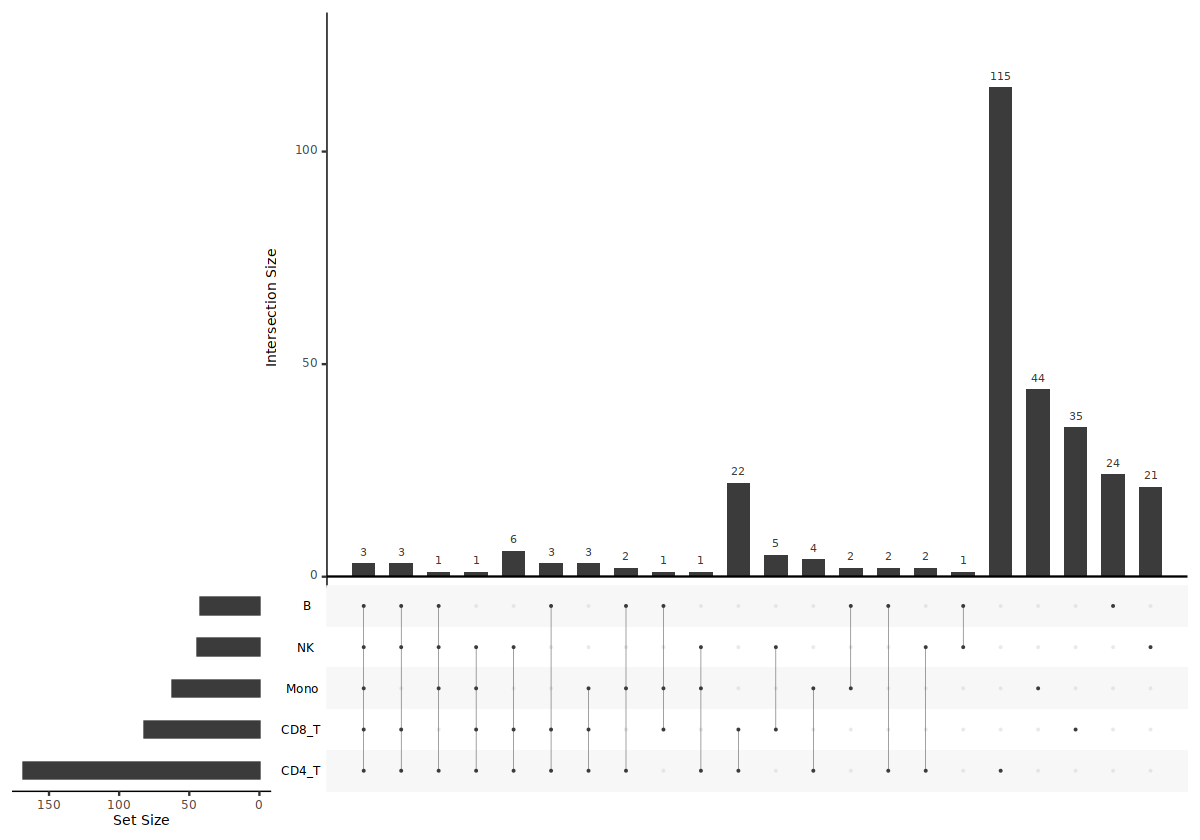

In [333]:
options(repr.plot.width=10, repr.plot.height=7)
upset_egenes = UpSetR::upset(fromList(tested_gene_pairs_list), order.by =c( 'freq', 'degree'),  decreasing = c(TRUE,TRUE), text.scale = 1,  point.size =0.5, line.size = 0.1) 
upset_egenes

In [334]:
pdf(paste0('figures/F9/F9_Overlap_sign_egenes_meta_' ,   n_sample_filter, '_', p_val_column , '.pdf'), width =3.5, height =2.5)
print(upset_egenes )
dev.off()

pdf 
  2

### Overlap of significant coeGenes

In [335]:
tested_gene_pairs_list = list()

In [311]:
filter_blacklist =FALSE  # whether to filter out gene-pairs on blacklist or not

In [314]:
for(i in unique(meta_results$cell_type)){
    data = meta_results[(meta_results$cell_type == i) & (meta_results$type == 'unique'),]
    if(filter_blacklist == TRUE){
        data = data[data$on_blacklist ==0,]
        }
    gene_pair = unique(data$coeGene)
    
    tested_gene_pairs_list[[paste0(unique(data$cell_type) )]] = gene_pair
    }

In [315]:
library(ggplotify)

In [316]:
str( tested_gene_pairs_list)

List of 5
 $ Mono : chr [1:641] "VIM" "SPN" "DPYD" "TEX264" ...
 $ CD4_T: chr [1:3127] "EEF1A1" "EEF1G" "ENSG00000227240" "FHIT" ...
 $ CD8_T: chr [1:1683] "FGFBP2" "GZMB" "RPS12" "HNRNPH1" ...
 $ NK   : chr [1:452] "CDC42" "CDC42SE1" "HNRNPH1" "GNLY" ...
 $ B    : chr [1:537] "BACH2" "ABI1" "ACP5" "ACTG1" ...


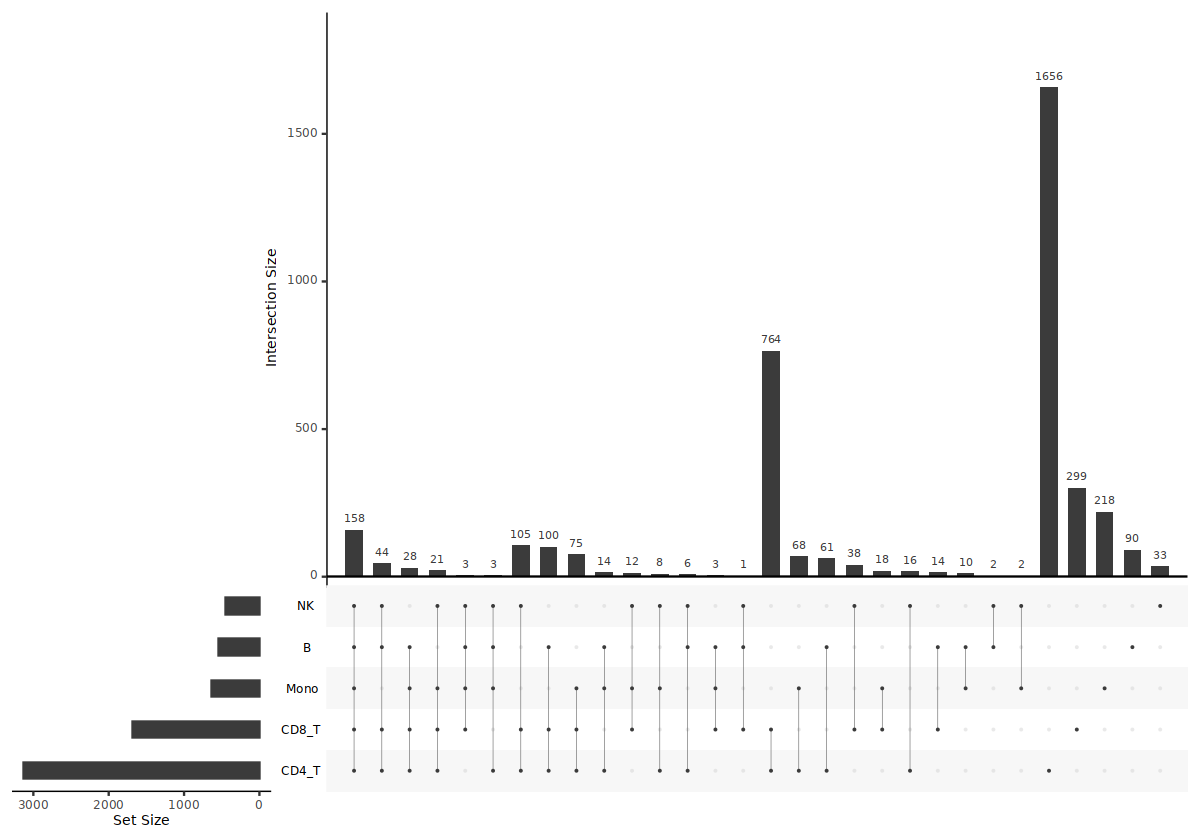

In [317]:
options(repr.plot.width=10, repr.plot.height=7)
upset_egenes = UpSetR::upset(fromList(tested_gene_pairs_list), order.by =c( 'freq', 'degree'),  decreasing = c(TRUE,TRUE), text.scale = 1,  point.size =0.5, line.size = 0.1) 
upset_egenes

In [319]:
pdf(paste0('figures/F9/F9_Overlap_sign_coegenes_meta_' ,   n_sample_filter, '_', p_val_column , '.pdf'), width =3.5, height =2.5)
print(upset_egenes)
dev.off()

pdf 
  2

### Overlap of significant Gene-Pairs

In [320]:
tested_gene_pairs_list = list()

In [322]:
for(i in unique(meta_results$cell_type)){
    data = meta_results[(meta_results$cell_type == i) & (meta_results$type == 'unique'),]
    gene_pair = unique(data$feature_id)
    
    tested_gene_pairs_list[[paste0(unique(data$cell_type) )]] = gene_pair
    }

In [323]:
library(ggplotify)

In [324]:
str( tested_gene_pairs_list)

List of 5
 $ Mono : chr [1:1599] "ACSL5_VIM" "SPN_STK32C" "DPYD_SFMBT2" "ADK_TEX264" ...
 $ CD4_T: chr [1:8567] "EEF1A1_NMT2" "EEF1G_NMT2" "ENSG00000227240_NMT2" "FHIT_NMT2" ...
 $ CD8_T: chr [1:4291] "ANK3_FGFBP2" "ANK3_GZMB" "PPA1_RPS12" "HNRNPH1_SAR1A" ...
 $ NK   : chr [1:800] "CDC42_SAR1A" "CDC42SE1_SAR1A" "HNRNPH1_SAR1A" "CD3E_GNLY" ...
 $ B    : chr [1:867] "BACH2_TMEM123" "BACH2_CORO1B" "ABI1_RPS26" "ACP5_RPS26" ...


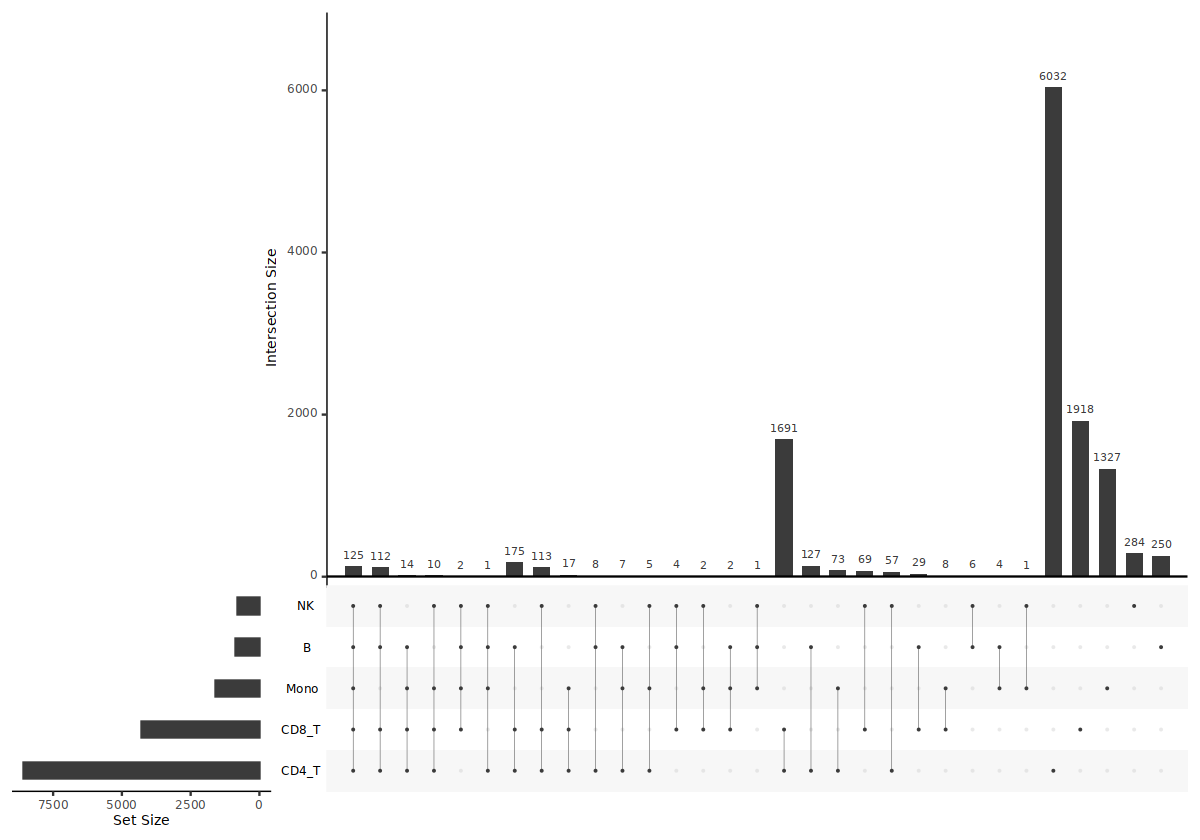

In [325]:
options(repr.plot.width=10, repr.plot.height=7)
upset_egenes = UpSetR::upset(fromList(tested_gene_pairs_list), order.by =c( 'freq', 'degree'),  decreasing = c(TRUE,TRUE), text.scale = 1,  point.size =0.5, line.size = 0.1) 
upset_egenes

In [327]:
pdf(paste0('figures/F9/F9_Overlap_sign_genepairs_meta_' ,   n_sample_filter, '_', p_val_column , '.pdf'), width =3.5, height =2.5)
print(upset_egenes)
dev.off()

pdf 
  2

### Overlap eGenes tested across all cell-types

In [337]:
head(snp_gene_mapping,2)

,feature_id,cell_type,X,snp_id,feature_start,feature_end,p_value,beta
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,A1BG,B,1348,19:58406208:G:A,58345178,58353499,4.333125e-07,-0.1954896
2,A1BG,CD4_T,3178,19:58497199:G:A,58345178,58353499,2.302583e-13,-0.2558016


In [338]:
eGene_all_cell_types = unique(snp_gene_mapping[,c('feature_id', 'cell_type')]) %>% group_by(feature_id) %>% summarise(amount_cell_types = length(unique(cell_type)),
                                                                                                                cell_types = paste0(unique(cell_type), collapse = ';'))

In [339]:
eGene_all_cell_types = eGene_all_cell_types[eGene_all_cell_types$amount_cell_types == 5,]

In [340]:
nrow(eGene_all_cell_types)

[1] 442

In [341]:
head(eGene_all_cell_types,2)

feature_id,amount_cell_types,cell_types
<chr>,<int>,<chr>
ABRACL,5,B;CD4_T;CD8_T;Mono;NK
ACYP2,5,B;CD4_T;CD8_T;Mono;NK


In [342]:
overlap_cell_types = meta_results[(meta_results$type == 'unique') & (meta_results$eGene %in% eGene_all_cell_types$feature_id),]

In [343]:
length(unique(overlap_cell_types$eGene))

[1] 76

In [344]:
tested_gene_pairs_list = list()

In [345]:
#head(meta_results,2)

In [346]:
for(i in unique(overlap_cell_types$cell_type)){
    data =overlap_cell_types[(overlap_cell_types$cell_type == i) & (overlap_cell_types$type == 'unique'),]
    gene_pair = unique(data$eGene)
    
    tested_gene_pairs_list[[paste0(unique(data$cell_type) )]] = gene_pair
    }

In [347]:
str( tested_gene_pairs_list)

List of 5
 $ CD4_T: chr [1:58] "SAR1A" "PPA1" "TSPAN32" "CTSW" ...
 $ NK   : chr [1:14] "SAR1A" "CTSW" "GLTP" "RPS26" ...
 $ CD8_T: chr [1:28] "PPA1" "SAR1A" "TSPAN32" "TRMT112" ...
 $ B    : chr [1:17] "RPS26" "TRAF3" "RPL36AL" "VCPKMT" ...
 $ Mono : chr [1:20] "RPS26" "FRY" "VPS53" "EIF5A" ...


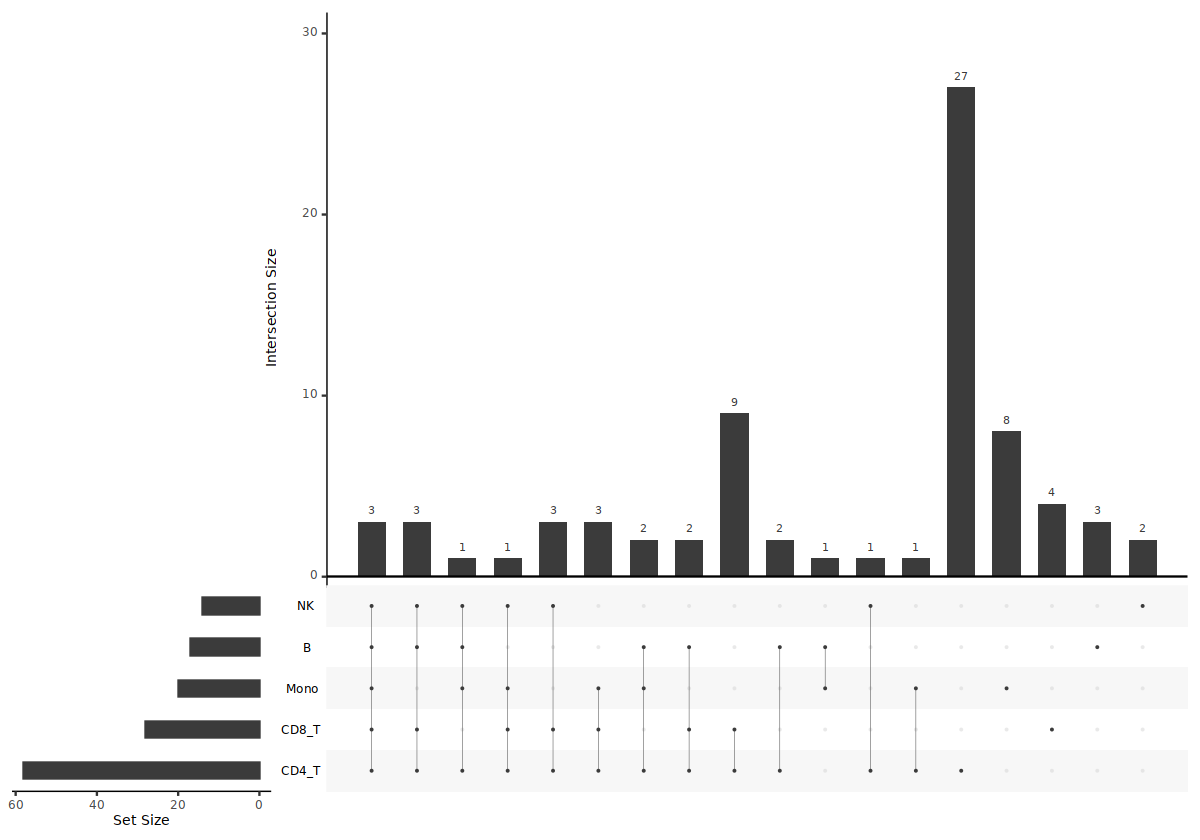

In [348]:
options(repr.plot.width=10, repr.plot.height=7)
upset_egenes = UpSetR::upset(fromList(tested_gene_pairs_list), order.by =c( 'freq', 'degree'),  decreasing = c(TRUE,TRUE), text.scale = 1,  point.size =0.5, line.size = 0.1) 
upset_egenes

In [349]:
pdf(paste0('figures/F9/F9_Overlap_sign_egenes_tested_all_meta_' ,   n_sample_filter, '_', p_val_column , '.pdf'), width =3.5, height =2.5)
print(upset_egenes )
dev.off()

pdf 
  2

### Overlap coeGenes tested across all cell-types

In [352]:
head(gene_list,2)

cell_type,gene
<chr>,<chr>
B,x
B,AC004687.1


In [353]:
coeGene_all_cell_types = unique(gene_list[,c('gene', 'cell_type')]) %>% group_by(gene) %>% summarise(amount_cell_types = length(unique(cell_type)),
                                                                                                                cell_types = paste0(unique(cell_type), collapse = ';'))

In [354]:
coeGene_all_cell_types = coeGene_all_cell_types[coeGene_all_cell_types$amount_cell_types == 5,]

In [355]:
nrow(coeGene_all_cell_types )

[1] 7672

In [356]:
head(coeGene_all_cell_types ,2)

gene,amount_cell_types,cell_types
<chr>,<int>,<chr>
A1BG,5,Mono;CD8_T;CD4_T;B;NK
AAGAB,5,CD4_T;B;NK;Mono;CD8_T


In [357]:
overlap_cell_types = meta_results[(meta_results$type == 'unique') & (meta_results$coeGene %in% coeGene_all_cell_types$gene),]

In [358]:
length(unique(overlap_cell_types$eGene))

[1] 284

In [359]:
filter_blacklist = FALSE

In [360]:
tested_gene_pairs_list = list()

In [361]:
#head(meta_results,2)

In [362]:
for(i in unique(overlap_cell_types$cell_type)){
    data =overlap_cell_types[(overlap_cell_types$cell_type == i) & (overlap_cell_types$type == 'unique'),]
    if(filter_blacklist == TRUE){
        data= data[data$on_blacklist == 0,]
        }
    gene_pair = unique(data$coeGene)
    
    tested_gene_pairs_list[[paste0(unique(data$cell_type) )]] = gene_pair
    }

In [363]:
str( tested_gene_pairs_list)

List of 5
 $ Mono : chr [1:499] "VIM" "DPYD" "TEX264" "FCGR3A" ...
 $ CD4_T: chr [1:2763] "EEF1A1" "EEF1G" "FHIT" "KLRB1" ...
 $ CD8_T: chr [1:1377] "GZMB" "RPS12" "HNRNPH1" "RPS19" ...
 $ NK   : chr [1:383] "CDC42" "CDC42SE1" "HNRNPH1" "GNLY" ...
 $ B    : chr [1:468] "BACH2" "ABI1" "ACP5" "ACTG1" ...


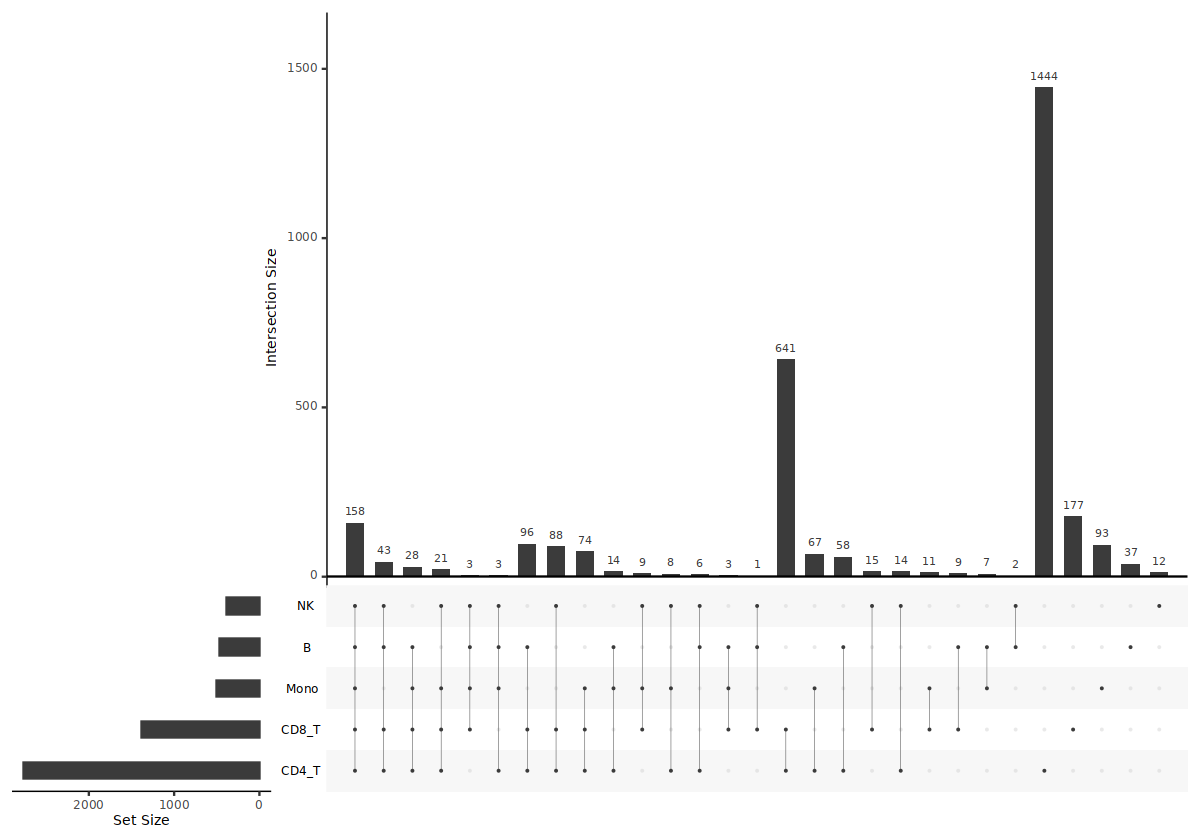

In [365]:
options(repr.plot.width=10, repr.plot.height=7)
upset_coegenes = UpSetR::upset(fromList(tested_gene_pairs_list), order.by =c( 'freq', 'degree'),  decreasing = c(TRUE,TRUE), text.scale = 1,  point.size =0.5, line.size = 0.1) 
upset_coegenes

In [367]:
pdf(paste0('figures/F9/F9_Overlap_sign_coegenes_tested_all_meta_' ,   n_sample_filter, '_', p_val_column , '.pdf'), width =3.5, height =2.5)
print(upset_coegenes)
dev.off()

pdf 
  2

In [368]:
nrow(overlap_cell_types)

[1] 79493

###  Overlap Gene-Pairs tested across cell-types

In [370]:
head(tests_on_results_meta,2)

V1,coQTL,eGene,feature_chromosome,feature_start,feature_end,coeGene,feature_id,snp_id,snp_position,⋯,z_score;Wijst,n_samples;Multiome,n_e_samples;Multiome,z_score;Multiome,n_samples;oneK1K,n_e_samples;oneK1K,z_score;oneK1K,dataset,cell_type,triplet
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,12:55991020:G:A;RPS26_EEF1A1,RPS26,12,56041351,56044676,EEF1A1,EEF1A1_RPS26,12:55991020:G:A,55991020,⋯,-8.399514,121,121,-9.171205,1014,1014,-41.02567,meta_analysis,CD4_T,12:55991020:G:A;EEF1A1_RPS26
1,12:55991020:G:A;RPS26_RPL10,RPS26,12,56041351,56044676,RPL10,RPL10_RPS26,12:55991020:G:A,55991020,⋯,-8.057972,121,121,-8.469697,1014,1014,-42.87260,meta_analysis,CD4_T,12:55991020:G:A;RPL10_RPS26


In [371]:
gene_pair_all_cell_types = unique(tests_on_results_meta[,c('feature_id', 'cell_type')]) %>% group_by(feature_id) %>% summarise(amount_cell_types = length(unique(cell_type)),
                                                                                                                cell_types = paste0(unique(cell_type), collapse = ';'))

In [372]:
gene_pair_all_cell_types = gene_pair_all_cell_types[gene_pair_all_cell_types$amount_cell_types == 5,]

In [373]:
nrow(gene_pair_all_cell_types )

[1] 7622

In [374]:
head(gene_pair_all_cell_types ,2)

feature_id,amount_cell_types,cell_types
<chr>,<int>,<chr>
A1BG_RPS26,5,CD4_T;Mono;NK;B;CD8_T
AAGAB_RPS26,5,CD4_T;Mono;NK;B;CD8_T


In [375]:
overlap_cell_types = meta_results[(meta_results$type == 'unique') & (meta_results$feature_id %in% gene_pair_all_cell_types$feature_id),]

In [376]:
length(unique(overlap_cell_types$feature_id))

[1] 7035

In [377]:
tested_gene_pairs_list = list()

In [378]:
#head(meta_results,2)

In [379]:
for(i in unique(overlap_cell_types$cell_type)){
    data =overlap_cell_types[(overlap_cell_types$cell_type == i) & (overlap_cell_types$type == 'unique'),]
    gene_pair = unique(data$feature_id)
    
    tested_gene_pairs_list[[paste0(unique(data$cell_type) )]] = gene_pair
    }

In [380]:
str( tested_gene_pairs_list)

List of 5
 $ Mono : chr [1:620] "ACSL5_VIM" "AIF1_GSTP1" "AOAH_GSTP1" "ARPC2_GSTP1" ...
 $ CD4_T: chr [1:5562] "AFF3_ANK3" "ANK3_ANXA1" "ANK3_ATM" "ANK3_CD52" ...
 $ NK   : chr [1:514] "CDC42_SAR1A" "CDC42SE1_SAR1A" "HNRNPH1_SAR1A" "BTG1_CD3E" ...
 $ CD8_T: chr [1:2780] "PPA1_RPS12" "HNRNPH1_SAR1A" "PPA1_RPS19" "GNLY_IDI1" ...
 $ B    : chr [1:689] "ABI1_RPS26" "ACP5_RPS26" "ACTG1_RPS26" "AFF3_RPS26" ...


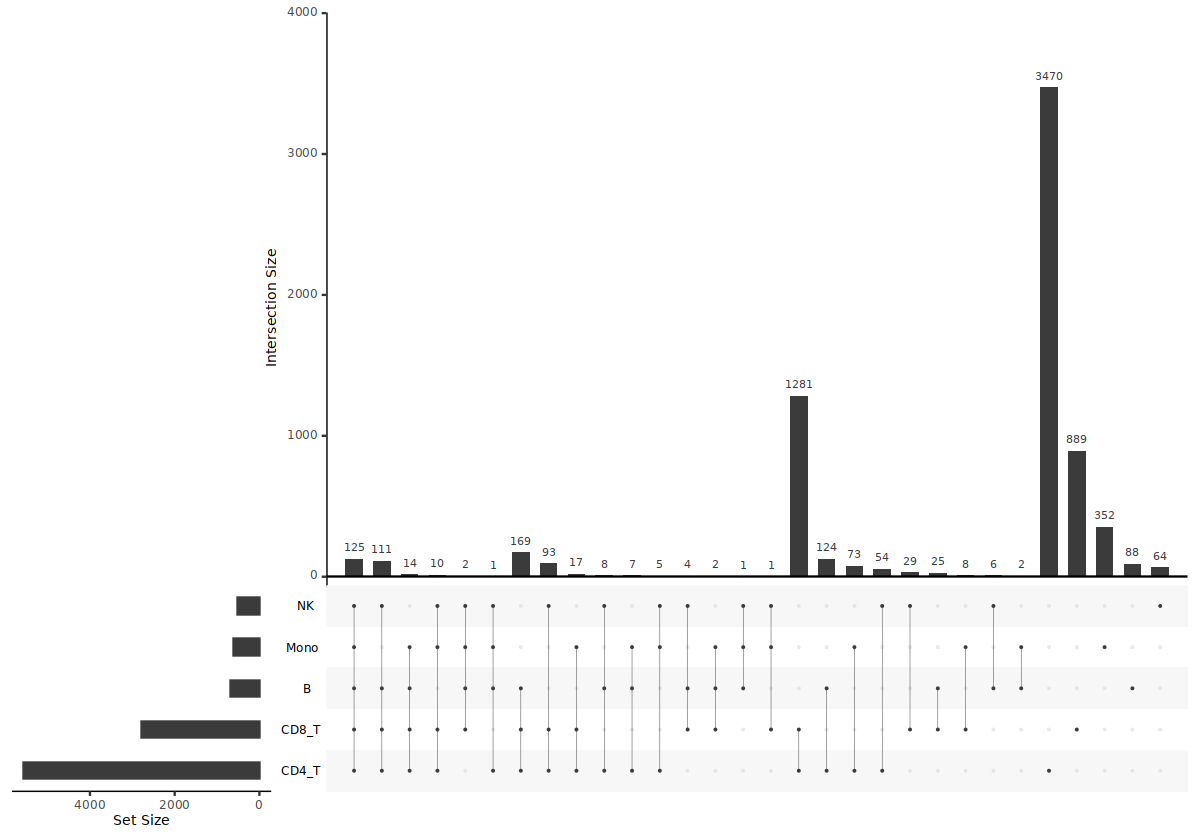

In [382]:
options(repr.plot.width=10, repr.plot.height=7)
upset_coegenes = UpSetR::upset(fromList(tested_gene_pairs_list), order.by =c( 'freq', 'degree'),  decreasing = c(TRUE,TRUE), text.scale = 1,  point.size =0.5, line.size = 0.1) 
upset_coegenes

In [383]:
pdf(paste0('figures/F9/F9_Overlap_sign_genepairs_tested_all_meta_' ,   n_sample_filter, '_', p_val_column , '.pdf'), width =3.5, height =2.5)
print(upset_coegenes)
dev.off()

pdf 
  2

In [384]:
nrow(overlap_cell_types)

[1] 73919

## Exk: Identify coeQTLs with different direction of effect

In [235]:
head(meta_results,2)

,V1,eGene,cell_type,snp_id,feature_id,coeGene,triplet,dataset,n_samples,p_val_mt,⋯,motifbreakr_hit,on_whitelist,on_blacklist,eGene_coloc,eGene_remap2022_crm_macs2_hg38_gene_1K,eGene_remap2022_nr_macs2_hg38_gene_1K,eGene_TF,eQTL_remap2022_crm_macs2_hg38_gene_1K,eQTL_remap2022_nr_macs2_hg38_gene_1K,eQTL_TF
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,1,A2M,CD4_T,12:8942630:T:C,A2M_CCL5,CCL5,12:8942630:T:C;A2M_CCL5,meta_5ds,982,0.8044262,⋯,,0,0,"Weight(H4 = 0.7 )|Height, inverse-rank normalized(H4 = 0.7 )|Eosinophill count (UKB data field 30150)(H4 = 0.96 )|Eosinophil counts(H4 = 0.96 )|Eosinophil counts(H4 = 0.96 )|White blood cell count(H4 = 0.94 )|Red blood cell count(H4 = 0.97 )|Appendicular lean mass(H4 = 0.82 )",SNRNP70,WDR5:hESC;|;SNRNP70:K-562;|;CA46,NA,NA,NA,NA
2,2,A2M,CD4_T,12:8942630:T:C,A2M_ENSG00000271774,ENSG00000271774,12:8942630:T:C;A2M_ENSG00000271774,meta_5ds,863,1.5010953,⋯,,0,0,"Weight(H4 = 0.7 )|Height, inverse-rank normalized(H4 = 0.7 )|Eosinophill count (UKB data field 30150)(H4 = 0.96 )|Eosinophil counts(H4 = 0.96 )|Eosinophil counts(H4 = 0.96 )|White blood cell count(H4 = 0.94 )|Red blood cell count(H4 = 0.97 )|Appendicular lean mass(H4 = 0.82 )",SNRNP70,WDR5:hESC;|;SNRNP70:K-562;|;CA46,NA,NA,NA,NA


In [238]:
check_data = meta_results[(meta_results$coeGene_go_tf ==1),]

In [239]:
check_data = unique(check_data[,c('eGene', 'cell_type', 'feature_id', 'snp_id', 'coeGene', 'z_score', 'oneK1K_mean_correlation')])

In [240]:
check_data = check_data %>% dcast(eGene + feature_id + snp_id + coeGene ~ cell_type, value.var = 'z_score')

In [241]:
head(check_data,2)

,eGene,feature_id,snp_id,coeGene,B,CD4_T,CD8_T,Mono,NK
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A2M,A2M_TSHZ2,12:8942630:T:C,TSHZ2,NA,6.38844,NA,NA,NA
2,A2M,A2M_BACH2,12:8971336:T:C,BACH2,NA,-6.66273,NA,NA,NA


In [242]:
check_data[is.na(check_data)] = 0

In [243]:
check_data[(check_data$Mono > 0) & (check_data$CD4_T < 0) ,]

,eGene,feature_id,snp_id,coeGene,B,CD4_T,CD8_T,Mono,NK
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1280,RPS26,JUND_RPS26,12:56007301:G:A,JUND,0,-11.65577,0,7.574947,0
1655,RPS26,JUND_RPS26,12:56042145:C:G,JUND,0,-13.13118,0,6.963313,0
1929,RPS26,JUND_RPS26,12:56076841:C:T,JUND,0,-12.73274,0,6.076235,0
1949,RPS26,NR4A3_RPS26,12:56076841:C:T,NR4A3,0,-11.39567,0,5.829530,0
2030,RPS26,JUND_RPS26,12:56083910:A:T,JUND,0,-12.73239,0,6.050564,0
2050,RPS26,NR4A3_RPS26,12:56083910:A:T,NR4A3,0,-11.17972,0,5.721301,0


In [244]:
check_data[(check_data$Mono > 0) & (check_data$NK < 0) ,]

eGene,feature_id,snp_id,coeGene,B,CD4_T,CD8_T,Mono,NK
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [245]:
meta_results[(meta_results$feature_id == 'NR4A3_RPS26') & (meta_results$snp_id == '12:56076841:C:T'),c('eGene', 'cell_type', 'feature_id', 'snp_id', 'coeGene', 'z_score', 'oneK1K_mean_correlation', 'motifbreakr_hit', 'on_blacklist', 'on_whitelist')]

,eGene,cell_type,feature_id,snp_id,coeGene,z_score,oneK1K_mean_correlation,motifbreakr_hit,on_blacklist,on_whitelist
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>
52081,RPS26,CD4_T,NR4A3_RPS26,12:56076841:C:T,NR4A3,-11.39567,-0.029509755,,0,0
82237,RPS26,Mono,NR4A3_RPS26,12:56076841:C:T,NR4A3,5.82953,-0.007486121,,0,0


In [246]:
meta_results[(meta_results$feature_id == 'JUND_RPS26') & (meta_results$snp_id == '12:56076841:C:T'),c('eGene', 'cell_type', 'feature_id', 'snp_id', 'coeGene', 'z_score', 'oneK1K_mean_correlation', 'motifbreakr_hit', 'on_blacklist', 'on_whitelist')]

,eGene,cell_type,feature_id,snp_id,coeGene,z_score,oneK1K_mean_correlation,motifbreakr_hit,on_blacklist,on_whitelist
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>
51705,RPS26,CD4_T,JUND_RPS26,12:56076841:C:T,JUND,-12.732743,-0.0431155,,0,0
82221,RPS26,Mono,JUND_RPS26,12:56076841:C:T,JUND,6.076235,0.1411314,,0,0


## Suppl. Table: Number of coeqtls, eGenes + gene-pairs on blacklist

In [123]:
blacklist_amounts = meta_results %>% group_by(cell_type, dataset) %>% summarise(amount_coeqtls = length(unique(triplet[on_blacklist == 1])),
                                                                                amount_coeqtls_n_rb_mt = length(unique(triplet[(on_blacklist ==1) & (eGene_rib == FALSE) & (coeGene_rib == FALSE) & (eGene_mt == FALSE) & (coeGene_mt == FALSE)])))

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [124]:
blacklist_amounts

cell_type,dataset,amount_coeqtls,amount_coeqtls_n_rb_mt
<chr>,<chr>,<int>,<int>
B,meta_5ds,648,11
CD4_T,meta_5ds,207,3
CD8_T,meta_5ds,9385,88
Mono,meta_5ds,7,1
NK,meta_5ds,1461,15


In [125]:
## Define whether gene-pair on blacklist

In [126]:
blacklist_amounts_gene_pair = meta_results %>% group_by(cell_type, dataset, feature_id, eGene_rib, coeGene_rib, eGene_mt, coeGene_mt , type) %>% summarise(on_blacklist = min(on_blacklist))

`summarise()` has grouped output by 'cell_type', 'dataset', 'feature_id',
'eGene_rib', 'coeGene_rib', 'eGene_mt', 'coeGene_mt'. You can override using
the `.groups` argument.


In [127]:
blacklist_amounts_gene_pair = blacklist_amounts_gene_pair %>% group_by(cell_type, dataset) %>% summarise(amount_gene_pairs = length(unique(feature_id[on_blacklist == 1])),
                                                                                                         amount_gene_pairs_n_rb_mt = length(unique(feature_id[(on_blacklist == 1) & (eGene_rib == FALSE) & (coeGene_rib == FALSE) & (eGene_mt == FALSE) & (coeGene_mt == FALSE) & (type == 'unique')])))

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [128]:
blacklist_amounts_gene_pair

cell_type,dataset,amount_gene_pairs,amount_gene_pairs_n_rb_mt
<chr>,<chr>,<int>,<int>
B,meta_5ds,2,0
CD4_T,meta_5ds,5,2
CD8_T,meta_5ds,323,53
Mono,meta_5ds,6,0
NK,meta_5ds,30,9


In [129]:
### Define whether eGene on blacklist

In [130]:
#meta_results[(meta_results$eGene == 'CHI3L2') & (meta_results$cell_type == 'CD8_T'),]

In [131]:
blacklist_amounts_eGene = meta_results %>% group_by(cell_type, dataset, eGene, eGene_rib,  eGene_mt, type) %>% summarise(on_blacklist = min(on_blacklist))

`summarise()` has grouped output by 'cell_type', 'dataset', 'eGene',
'eGene_rib', 'eGene_mt'. You can override using the `.groups` argument.


In [132]:
blacklist_amounts_eGene[blacklist_amounts_eGene$on_blacklist == 1,]

cell_type,dataset,eGene,eGene_rib,eGene_mt,type,on_blacklist
<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<int>
CD8_T,meta_5ds,HLA-DRB1_RPS18,NA,NA,duplicate,1
CD8_T,meta_5ds,RPS26_TESPA1,NA,NA,duplicate,1


In [133]:
blacklist_amounts_eGene = blacklist_amounts_eGene %>% group_by(cell_type, dataset) %>% summarise(amount_eGenes_unique = length(unique(eGene[(on_blacklist == 1) & (type == 'unique')])),
                                                                                                 amount_eGenes_unique_n_rb_mt	 = length(unique(eGene[(on_blacklist == 1) & (eGene_rib == FALSE)  & (eGene_mt == FALSE)  & (type == 'unique')])))

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [134]:
blacklist_amounts_eGene

cell_type,dataset,amount_eGenes_unique,amount_eGenes_unique_n_rb_mt
<chr>,<chr>,<int>,<int>
B,meta_5ds,0,0
CD4_T,meta_5ds,0,0
CD8_T,meta_5ds,0,0
Mono,meta_5ds,0,0
NK,meta_5ds,0,0


In [135]:
#### Summarise the blacklist information

In [136]:
blacklist_amounts = merge(blacklist_amounts, blacklist_amounts_gene_pair)

In [137]:
blacklist_amounts = merge(blacklist_amounts, blacklist_amounts_eGene)

In [138]:
blacklist_amounts

cell_type,dataset,amount_coeqtls,amount_coeqtls_n_rb_mt,amount_gene_pairs,amount_gene_pairs_n_rb_mt,amount_eGenes_unique,amount_eGenes_unique_n_rb_mt
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
B,meta_5ds,648,11,2,0,0,0
CD4_T,meta_5ds,207,3,5,2,0,0
CD8_T,meta_5ds,9385,88,323,53,0,0
Mono,meta_5ds,7,1,6,0,0,0
NK,meta_5ds,1461,15,30,9,0,0


In [139]:
blacklist_amounts_long = melt(blacklist_amounts)

Using cell_type, dataset as id variables



In [140]:
head(blacklist_amounts_long,2)

,cell_type,dataset,variable,value
,<chr>,<chr>,<fct>,<int>
1,B,meta_5ds,amount_coeqtls,648
2,CD4_T,meta_5ds,amount_coeqtls,207


In [141]:
colnames(blacklist_amounts_long) = c('cell_type', 'dataset', 'variable', 'value_blacklist')

## Fig.1: Number of samples and number of cells per dataset

In [77]:
sample_overview = unique(sample_summary_stats[,c('amount_individuals', 'dataset')])

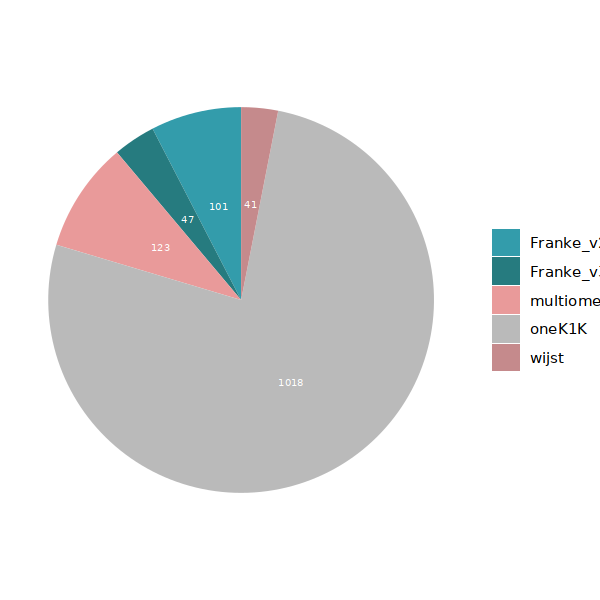

In [78]:
options(repr.plot.width=5, repr.plot.height=5)
sample_overview_plot = ggplot(sample_overview[sample_overview$dataset != 'meta_analysis',], 
       aes(x = "", y = amount_individuals, fill = dataset)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  plot_config + ds_fill +
  
  # Add labels inside the slices
  geom_text(aes(label = amount_individuals), 
            position = position_stack(vjust = 0.5), color = "white", size = 2, hjust =0.5) +
  
  # Remove axis labels and ticks
  theme_void() + theme(legend.title = element_blank()) # Removes all axis text and background grid
sample_overview_plot

In [79]:
pdf(paste0('figures/F9/F9_Sample_overview.pdf'), width =3, height =3)
sample_overview_plot
dev.off()

pdf 
  2

In [80]:
### Save data for figure
write.csv(sample_overview, paste0('figures/F9/F9_Sample_overview_data.csv'))

In [81]:
### Plot the overview of the datasets

In [82]:
head(sample_summary_stats_ind,2)

V1,Assignment,amount_cells,dataset,cell_type
<int>,<chr>,<int>,<chr>,<chr>
1,LL000086,460,Franke_split_v2,CD4_T
2,LL000694,356,Franke_split_v2,CD4_T


In [96]:
#pdfFonts()

In [101]:
unique(sample_summary_stats_ind$dataset)

[1] "Franke_split_v2" "Franke_split_v3" "wijst2018"       "multiome"       
[5] "oneK1k"

In [108]:
sample_summary_stats_ind$cell_type = factor(sample_summary_stats_ind$cell_type , levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))

In [109]:
options(repr.plot.width=10, repr.plot.height=7)
#pdf(paste0('figures/F9/F9_Amount_Cells_per_Sample.pdf'), width =8, height =3)

plot1 = ggplot(sample_summary_stats_ind, aes(x=dataset, y=amount_cells, fill=dataset)) + 
    geom_boxplot() +#  geom_hline(yintercept=10, linetype="dashed", color = "red", size=1)  +#  geom_hline(yintercept=50, linetype="dashed", color = "purple", size=1) +
    facet_wrap(cell_type ~.,  nrow = 1)  + scale_y_continuous(breaks = scales::pretty_breaks(n = 15)) + plot_config + ds_fill2  + ylim(0,1800)  + theme( axis.text.x = element_blank(), axis.label.x = element_blank()) + ylab('Number of cells')  #+ geom_jitter(color="red", size=0.4, alpha=0.9)  
ggsave(paste0('figures/F9/F9_Amount_Cells_per_Sample.pdf'), plot =plot1, device = cairo_pdf, width =7.8, height =3)
#print(plot1)
#dev.off()
#plot1

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in plot_theme(plot):
"The `axis.label.x` theme element is not defined in the element hierarchy."
Warning message in plot_theme(plot):
"The `axis.label.x` theme element is not defined in the element hierarchy."


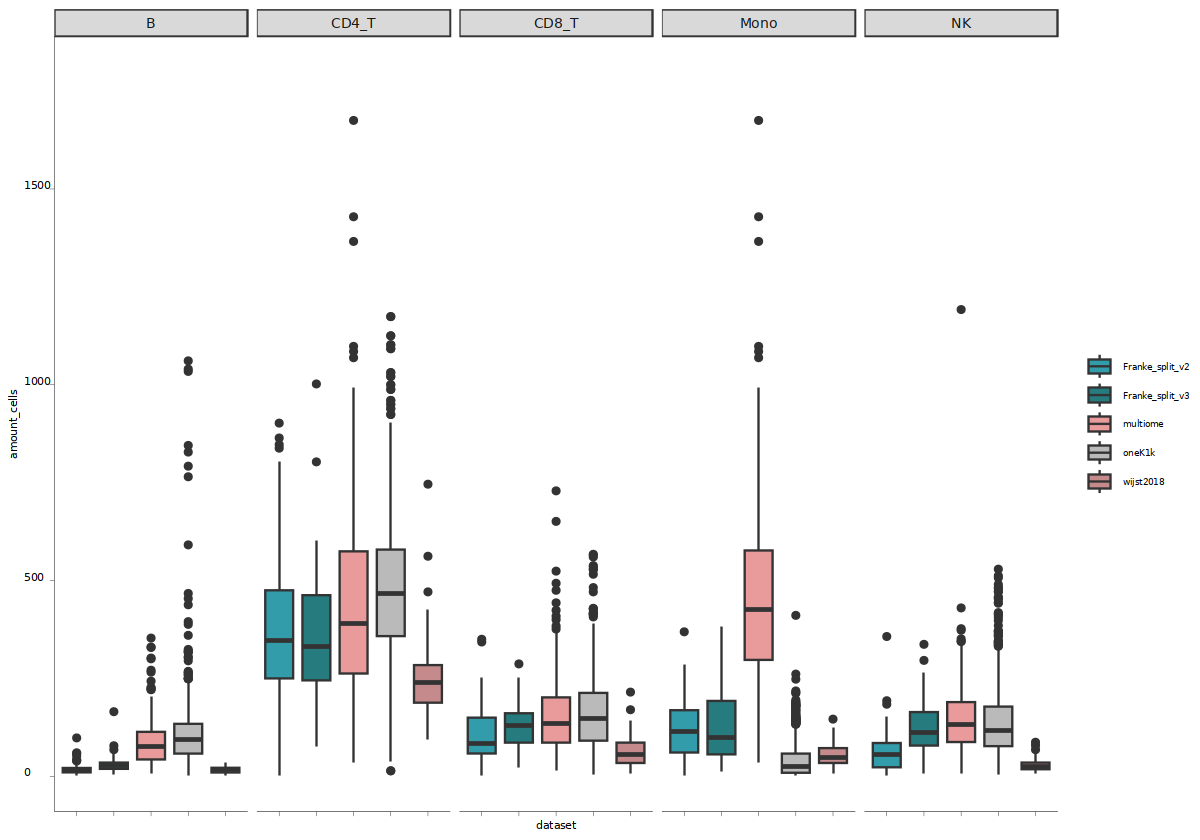

In [104]:
plot1

In [148]:
write.csv(sample_summary_stats_ind, paste0('figures/F9/F9_Amount_Cells_per_Sample_data.csv'))

In [136]:
## Mean amount of cells per cell-type and dataset

In [137]:
mean_cells_ds_ct = sample_summary_stats_ind  %>% group_by(dataset, cell_type) %>% summarise(mean_amount_cells = mean(amount_cells), n_ind = n(), sd_amount_cells = sd(amount_cells))

`summarise()` has grouped output by 'dataset'. You can override using the
`.groups` argument.


In [138]:
mean_cells_ct = sample_summary_stats_ind  %>% group_by(cell_type) %>% summarise(mean_amount_cells_ct = mean(amount_cells), n_ind_ct = n(), sd_amount_cells_ct = sd(amount_cells))

In [139]:
mean_cells_ds_ct = merge(mean_cells_ds_ct, mean_cells_ct )

In [140]:
mean_cells_ds_ct$cell_type = factor(mean_cells_ds_ct$cell_type, levels = c( "CD4_T","CD8_T",  "NK",  "B", "Mono" ))

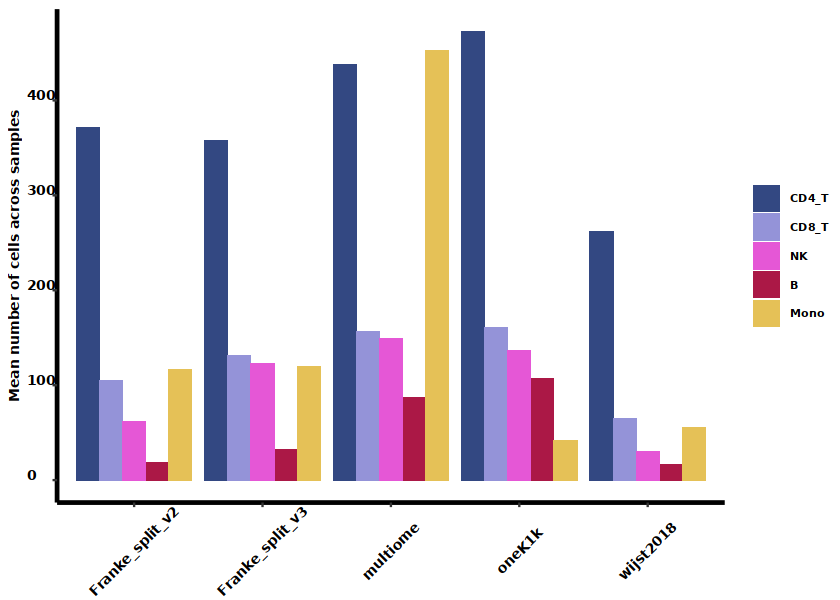

In [141]:
options(repr.plot.width=7, repr.plot.height=5)
mean_amount_of_cells_plot = ggplot(mean_cells_ds_ct, aes(x=dataset, y=mean_amount_cells, fill=cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + cell_type_fill + ylab('Mean number of cells across samples') + theme(axis.title.x = element_blank(), axis.text.x =element_text(angle = 45))
mean_amount_of_cells_plot

In [142]:
pdf(paste0('figures/F9/F9_Amount_Cells_overview.pdf'), width =5, height =3)
mean_amount_of_cells_plot
dev.off()

pdf 
  2

In [143]:
### Save the data for the plot

In [144]:
write.csv(mean_cells_ds_ct, paste0('figures/F9/F9_Amount_Cells_overview_data.csv'))

In [145]:
#mean_cells_ds_ct

## Fig.2 / Suppl. Visualize top eGenes with most coeGenes and distribution of amount coeGenes

In [161]:
head(meta_results,1)

,V1,eGene,coeGene,snp_id,cell_type,feature_id,triplet,n_samples,p_value,z_score,⋯,eQTL_remap2022_1,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl,simulation_score,ccInteraction
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<int>
1,1,A2M,BACH2,12:8971336:T:C,CD4_T,A2M_BACH2,12:8971336:T:C;A2M_BACH2,977,2.687871e-11,-6.66273,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0


In [162]:
### Short summary of amount of coeGenes

In [163]:
unique(meta_results$type)

[1] "unique"    "duplicate"

In [164]:
invest = unique(meta_results[meta_results$type == 'unique',c('cell_type', 'eGene', 'coeGene')])

In [165]:
### Calculate the amount of co-eGenes per egene

In [166]:
invest_merge  = invest  %>% group_by( eGene) %>% summarise(amount_coegenes = length(unique(coeGene)))

In [167]:
invest  = invest  %>% group_by(cell_type, eGene) %>% summarise(amount_coegenes = n())

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [168]:
### Bar plot for visualization

In [169]:
plot_data = invest
colnames(plot_data) = c('cell_type', 'eGene', 'amount_coegenes_ct')

In [170]:
plot_data = merge(plot_data, invest_merge)

In [171]:
head(plot_data,2)

,eGene,cell_type,amount_coegenes_ct,amount_coegenes
,<chr>,<chr>,<int>,<int>
1,A2M,CD4_T,42,42
2,A2M-AS1,CD8_T,1,1


In [172]:
plot_data$cell_type = factor(plot_data$cell_type, levels = c( "Mono",  "B", "NK", "CD8_T","CD4_T" ))

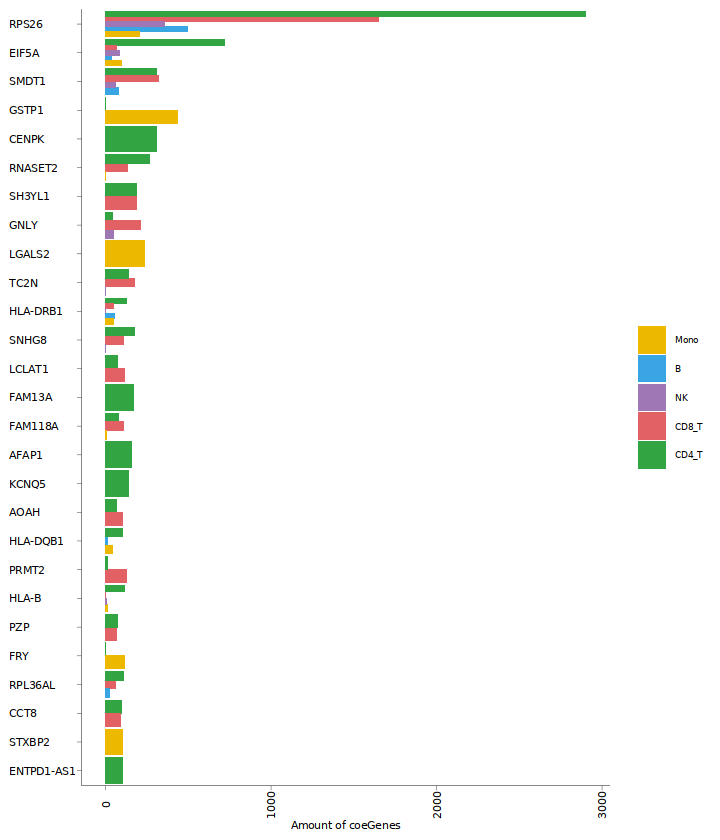

In [173]:
options(repr.plot.width=6, repr.plot.height=7)
top_genes_plot = ggplot(plot_data[plot_data$amount_coegenes > 100,], aes(x=reorder(eGene, amount_coegenes), y=amount_coegenes_ct, fill = cell_type))  +
  geom_bar(stat = "identity", position = "dodge") + plot_config + cell_type_fill +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0.5), axis.text.y = element_text(vjust = 0.5), axis.title.y = element_blank()) + labs(y ='Amount of coeGenes')+ scale_x_discrete(expand = expansion(mult = c(0.02, 0.02))) + coord_flip() # +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0.5)
top_genes_plot

In [134]:
pdf(paste0('figures/F9/F9_Top_eGenes', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =3, height =5)
print(top_genes_plot)
dev.off()

pdf 
  2

In [135]:
### Save the data for the figure

In [136]:
write.csv(plot_data, paste0('figures/F9/F9_Top_eGenes', '_' ,  n_sample_filter, '_', p_val_column , '_data.csv'))

In [137]:
### Per cell-type visualize distribution of amount of co-eGenes as histogram

In [174]:
head(plot_data,2)

,eGene,cell_type,amount_coegenes_ct,amount_coegenes
,<chr>,<fct>,<int>,<int>
1,A2M,CD4_T,42,42
2,A2M-AS1,CD8_T,1,1


In [179]:
max(plot_data$amount_coegenes)

[1] 3511

In [175]:
plot_data$cell_type = factor(plot_data$cell_type, levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))

In [180]:
plot_data= plot_data %>%  mutate(amount_coegenes_ct_bin = cut(amount_coegenes_ct, breaks=c(0,5, 10, 15,20, 30, 40,50, 60, 70, 80, 90, 100,3512)))

In [181]:
plot_data_agg = plot_data %>% group_by(cell_type, amount_coegenes_ct_bin ) %>% summarise(amount_egenes = length(unique(eGene)))

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


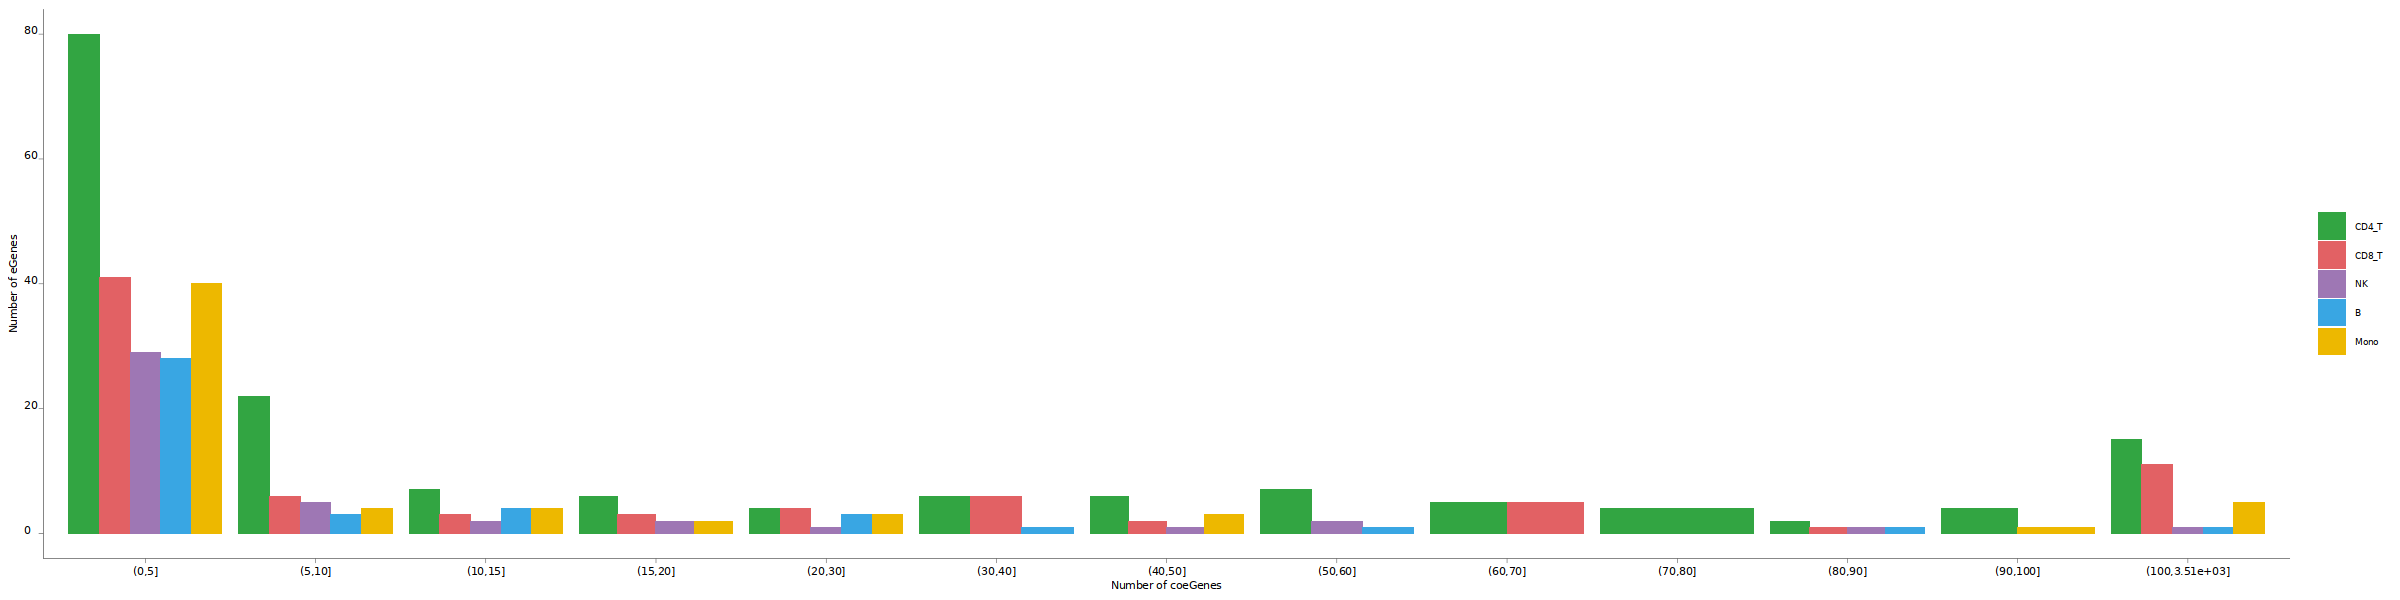

In [182]:
options(repr.plot.width=20, repr.plot.height=5)
hist_coegene_distr = ggplot(plot_data_agg, aes(x=amount_coegenes_ct_bin, y = amount_egenes, fill = cell_type))  + 
    plot_config + cell_type_fill + geom_bar(stat = 'identity' ,position = 'dodge') + xlab('Number of coeGenes') + ylab('Number of eGenes')

hist_coegene_distr

In [184]:
pdf(paste0('figures/F9/F9_Hist_coeGene_Dist_T', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =6.3, height =2)
print(hist_coegene_distr)
dev.off()

pdf 
  2

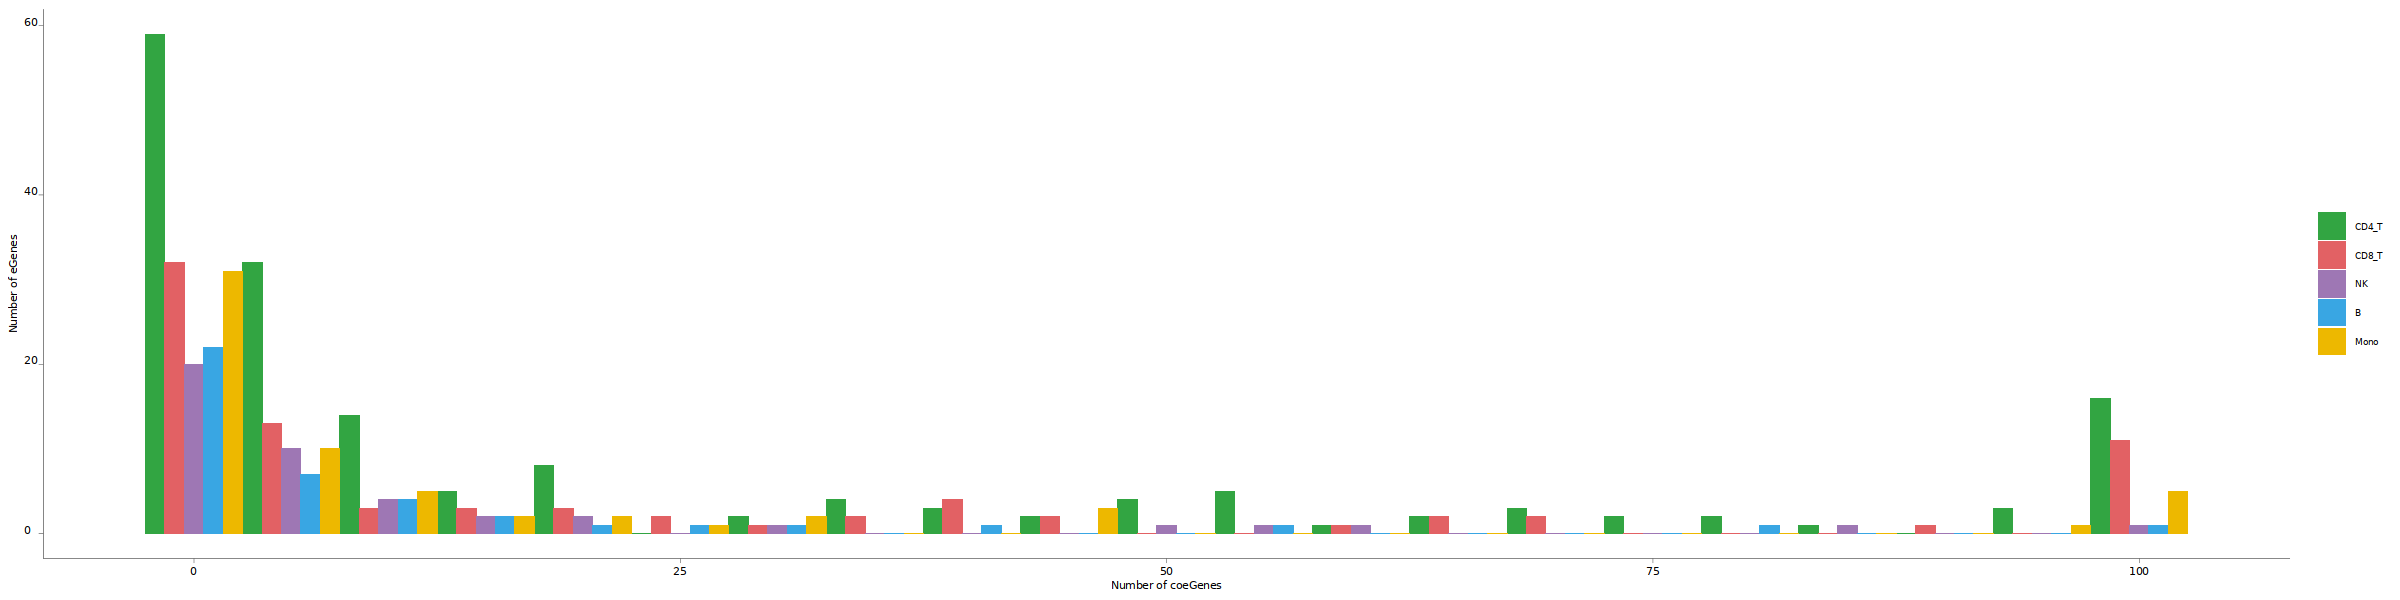

In [148]:
options(repr.plot.width=20, repr.plot.height=5)
hist_coegene_distr = ggplot(plot_data, aes(x=amount_coegenes_ct, fill = cell_type))  + 
    plot_config + cell_type_fill + geom_histogram(position = 'dodge', binwidth = 5) + xlab('Number of coeGenes') + ylab('Number of eGenes')

hist_coegene_distr

In [ ]:
### Table with overview

In [169]:
head(invest_merge,2)

eGene,amount_coegenes
<chr>,<int>
A2M,42
A2M-AS1,1


In [170]:
invest = invest %>% dcast(eGene ~ cell_type, value.var = 'amount_coegenes')

In [171]:
invest[is.na(invest)] = 0

In [172]:
invest = merge(invest, invest_merge)

In [173]:
head(snp_gene_mapping_all,2)

,X,feature_id,snp_id,feature_start,feature_end,p_value,beta,cell_type
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,CD52,1:26306290:C:T,26317957,26320523,1.903053e-214,-1.0420481,Mono
2,2,CD52,1:26358699:C:T,26317957,26320523,2.438329e-19,0.3022236,Mono


In [174]:
snp_gene_mapping[snp_gene_mapping$feature_id == 'LGALS2',]

,feature_id,cell_type,X,snp_id,feature_start,feature_end,p_value,beta
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
6425,LGALS2,Mono,1780,22:37574978:A:G,37570246,37582616,6.438749e-233,0.9699896


In [175]:
invest %>% arrange(-amount_coegenes)

eGene,B,CD4_T,CD8_T,Mono,NK,amount_coegenes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
RPS26,497,2903,1652,205,355,3511
EIF5A,38,716,67,94,86,778
SMDT1,81,305,322,0,60,443
GSTP1,0,1,0,437,0,437
CENPK,0,308,0,0,0,308
RNASET2,0,265,135,1,0,296
GNLY,0,43,211,0,48,252
SH3YL1,0,184,187,0,0,252
LGALS2,0,0,0,236,0,236


## Fig.2: Visualize number of eGenes/ coeGenes/ gene-pairs per cell-type (bar plot)

In [119]:
## Plot per cell-type Triplets

In [120]:
meta_summary_long = melt(meta_summary)

Using cell_type, dataset as id variables



In [121]:
head(meta_summary_long,2)

,cell_type,dataset,variable,value
,<chr>,<chr>,<fct>,<int>
1,B,meta_5ds,amount_coeqtls,7291
2,CD4_T,meta_5ds,amount_coeqtls,49847


In [142]:
head(blacklist_amounts_long,2)

,cell_type,dataset,variable,value_blacklist
,<chr>,<chr>,<fct>,<int>
1,B,meta_5ds,amount_coeqtls,648
2,CD4_T,meta_5ds,amount_coeqtls,207


In [143]:
meta_summary_long = merge(meta_summary_long, blacklist_amounts_long, all.x = TRUE)

In [144]:
unique(meta_summary_long$variable)

[1] amount_coeqtls               amount_coeqtls_unique       
[3] amount_coeqtls_n_rb_mt       amount_gene_pairs           
[5] amount_gene_pairs_unique     amount_gene_pairs_n_rb_mt   
[7] amount_eGenes_unique         amount_eGenes_unique_n_rb_mt
[9] amount_eGenes_gwas          
9 Levels: amount_coeqtls amount_coeqtls_unique ... amount_eGenes_gwas

In [145]:
#meta_summary_long$cell_type = factor(meta_summary_long$cell_type, levels = c( "Mono", "NK",  "B","CD8_T","CD4_T" ))
meta_summary_long$cell_type = factor(meta_summary_long$cell_type, levels = c(  "CD4_T","CD8_T" ,"NK" ,"B", "Mono" ))

In [146]:
head(meta_summary_long,2)

,cell_type,dataset,variable,value,value_blacklist
,<fct>,<chr>,<fct>,<int>,<int>
1,B,meta_5ds,amount_coeqtls,7291,648
2,B,meta_5ds,amount_coeqtls_unique,7108,NA


In [147]:
unique(meta_summary_long$variable)

[1] amount_coeqtls               amount_coeqtls_unique       
[3] amount_coeqtls_n_rb_mt       amount_gene_pairs           
[5] amount_gene_pairs_unique     amount_gene_pairs_n_rb_mt   
[7] amount_eGenes_unique         amount_eGenes_unique_n_rb_mt
[9] amount_eGenes_gwas          
9 Levels: amount_coeqtls amount_coeqtls_unique ... amount_eGenes_gwas

In [148]:
meta_summary_long$type = paste0(meta_summary_long$cell_type, '_', str_extract(meta_summary_long$variable, 'n_rb'))

In [149]:
meta_summary_long$type = str_replace(meta_summary_long$type, '_NA', '')

In [150]:
unique(meta_summary_long$type)

[1] "B"          "B_n_rb"     "CD4_T"      "CD4_T_n_rb" "CD8_T"     
 [6] "CD8_T_n_rb" "Mono"       "Mono_n_rb"  "NK"         "NK_n_rb"

In [151]:
### Plot for gene-pairs

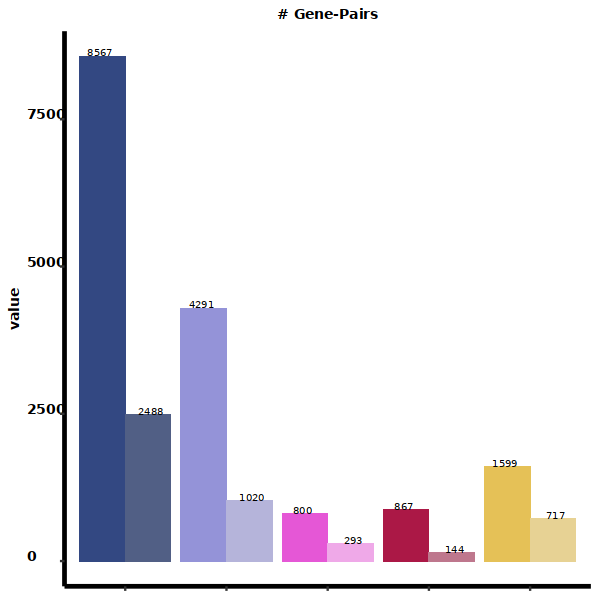

In [354]:
options(repr.plot.width=5, repr.plot.height=5)
genepair_plot = ggplot(meta_summary_long[meta_summary_long$variable %in% c('amount_gene_pairs_unique', 'amount_gene_pairs_n_rb_mt'),], aes(x=cell_type, y=value, fill =type))  +
  geom_bar(stat = "identity", position = "dodge")   + plot_config +cell_type_fill_n_rb +
  theme(axis.text.x = element_blank(), axis.title.x = element_blank(), legend.position = 'None') +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0, size = 2) + ggtitle('# Gene-Pairs')
genepair_plot

In [355]:
unique(meta_summary_long$type)

[1] "B"          "B_n_rb"     "CD4_T"      "CD4_T_n_rb" "CD8_T"     
 [6] "CD8_T_n_rb" "Mono"       "Mono_n_rb"  "NK"         "NK_n_rb"

In [356]:
pdf(paste0('figures/F9/F9_Gene_Pairs', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =3, height =2.3)
print(genepair_plot)
dev.off()

pdf 
  2

In [357]:
### Save the data for the plot

In [358]:
write.csv(meta_summary_long[meta_summary_long$variable %in% c('amount_gene_pairs_unique', 'amount_gene_pairs_n_rb_mt'), c('cell_type', 'dataset', 'variable', 'value', 'type')], paste0('figures/F9/F9_Gene_Pairs', '_' ,  n_sample_filter, '_', p_val_column , '_data.csv'))

In [359]:
### Plot for eGenes

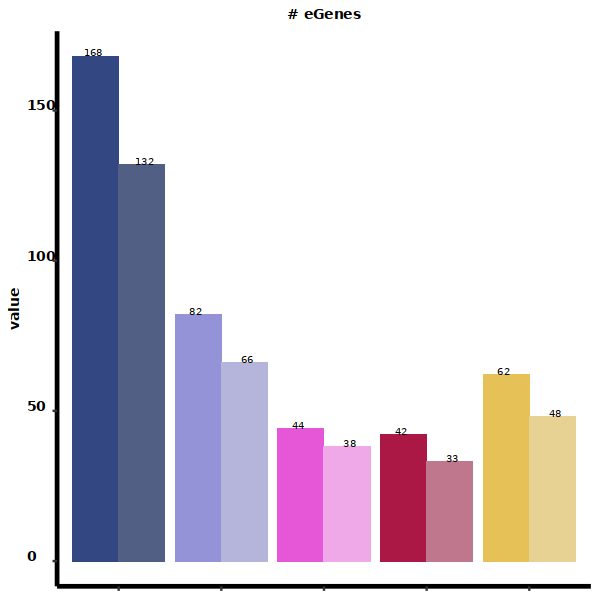

In [360]:
options(repr.plot.width=5, repr.plot.height=5)
eGene_plot = ggplot(meta_summary_long[meta_summary_long$variable %in% c('amount_eGenes_unique', 'amount_eGenes_unique_n_rb_mt'),], aes(x=cell_type, y=value, fill =type))  +
  geom_bar(stat = "identity", position = "dodge")   + plot_config +cell_type_fill_n_rb +
  theme(axis.text.x = element_blank(), axis.title.x = element_blank(), legend.position = 'None') +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0, size = 2) + ggtitle('# eGenes')
eGene_plot

In [361]:
unique(meta_summary_long$type)

[1] "B"          "B_n_rb"     "CD4_T"      "CD4_T_n_rb" "CD8_T"     
 [6] "CD8_T_n_rb" "Mono"       "Mono_n_rb"  "NK"         "NK_n_rb"

In [362]:
pdf(paste0('figures/F9/F9_eGenes', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =3, height =2.3)
print(eGene_plot)
dev.off()

pdf 
  2

In [363]:
### Save the data for the plot

In [364]:
write.csv(meta_summary_long[meta_summary_long$variable %in% c('amount_eGenes_unique', 'amount_eGenes_unique_n_rb_mt'), c('cell_type', 'dataset', 'variable', 'value', 'type')], paste0('figures/F9/F9_eGenes', '_' ,  n_sample_filter, '_', p_val_column , '_data.csv'))

## Suppl.: Compairson Meta-Analysis vs. Single-Datasets

In [180]:
### Meta-Analysis results

In [181]:
head(meta_summary)

cell_type,dataset,amount_coeqtls,amount_coeqtls_unique,amount_coeqtls_n_rb_mt,amount_gene_pairs,amount_gene_pairs_unique,amount_gene_pairs_unique_n_rb_mt,amount_eGenes_unique,amount_eGenes_unique_n_rb_mt,amount_eGenes_gwas
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B,meta_5ds,7291,7108,381,879,867,144,42,33,5
CD4_T,meta_5ds,49847,49754,3674,8582,8567,2488,168,132,11
CD8_T,meta_5ds,25335,25329,1354,4294,4291,1020,82,66,3
Mono,meta_5ds,4319,4292,995,1608,1599,717,62,48,8
NK,meta_5ds,4836,4826,397,805,800,293,44,38,2


In [182]:
head(coeqtl_summary)

cell_type,dataset,amount_coeqtls,amount_coeqtls_unique,amount_coeqtls_n_rb_mt,amount_gene_pairs,amount_gene_pairs_unique,amount_gene_pairs_unique_n_rb_mt,amount_eGenes_unique,amount_eGenes_unique_n_rb_mt,amount_eGenes_gwas
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B,oneK1K,7522,7387,303,863,853,117,43,31,4
CD4_T,oneK1K,48333,48246,3459,8163,8149,2286,153,124,7
CD8_T,oneK1K,25133,25125,1249,4221,4219,977,70,55,3
Mono,oneK1K,3368,3356,563,1142,1136,412,33,28,5
NK,oneK1K,4770,4761,349,757,753,250,36,30,2


In [183]:
summary = rbind(coeqtl_summary, meta_summary)

In [184]:
summary_long = melt(summary)

Using cell_type, dataset as id variables



In [186]:
summary_long$fill_value = paste0(summary_long$dataset, '_', summary_long$cell_type)

In [188]:
unique(summary_long$fill_value )

[1] "oneK1K_B"       "oneK1K_CD4_T"   "oneK1K_CD8_T"   "oneK1K_Mono"   
 [5] "oneK1K_NK"      "meta_5ds_B"     "meta_5ds_CD4_T" "meta_5ds_CD8_T"
 [9] "meta_5ds_Mono"  "meta_5ds_NK"

In [195]:
summary_long$cell_type = factor(summary_long$cell_type, levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono' ))

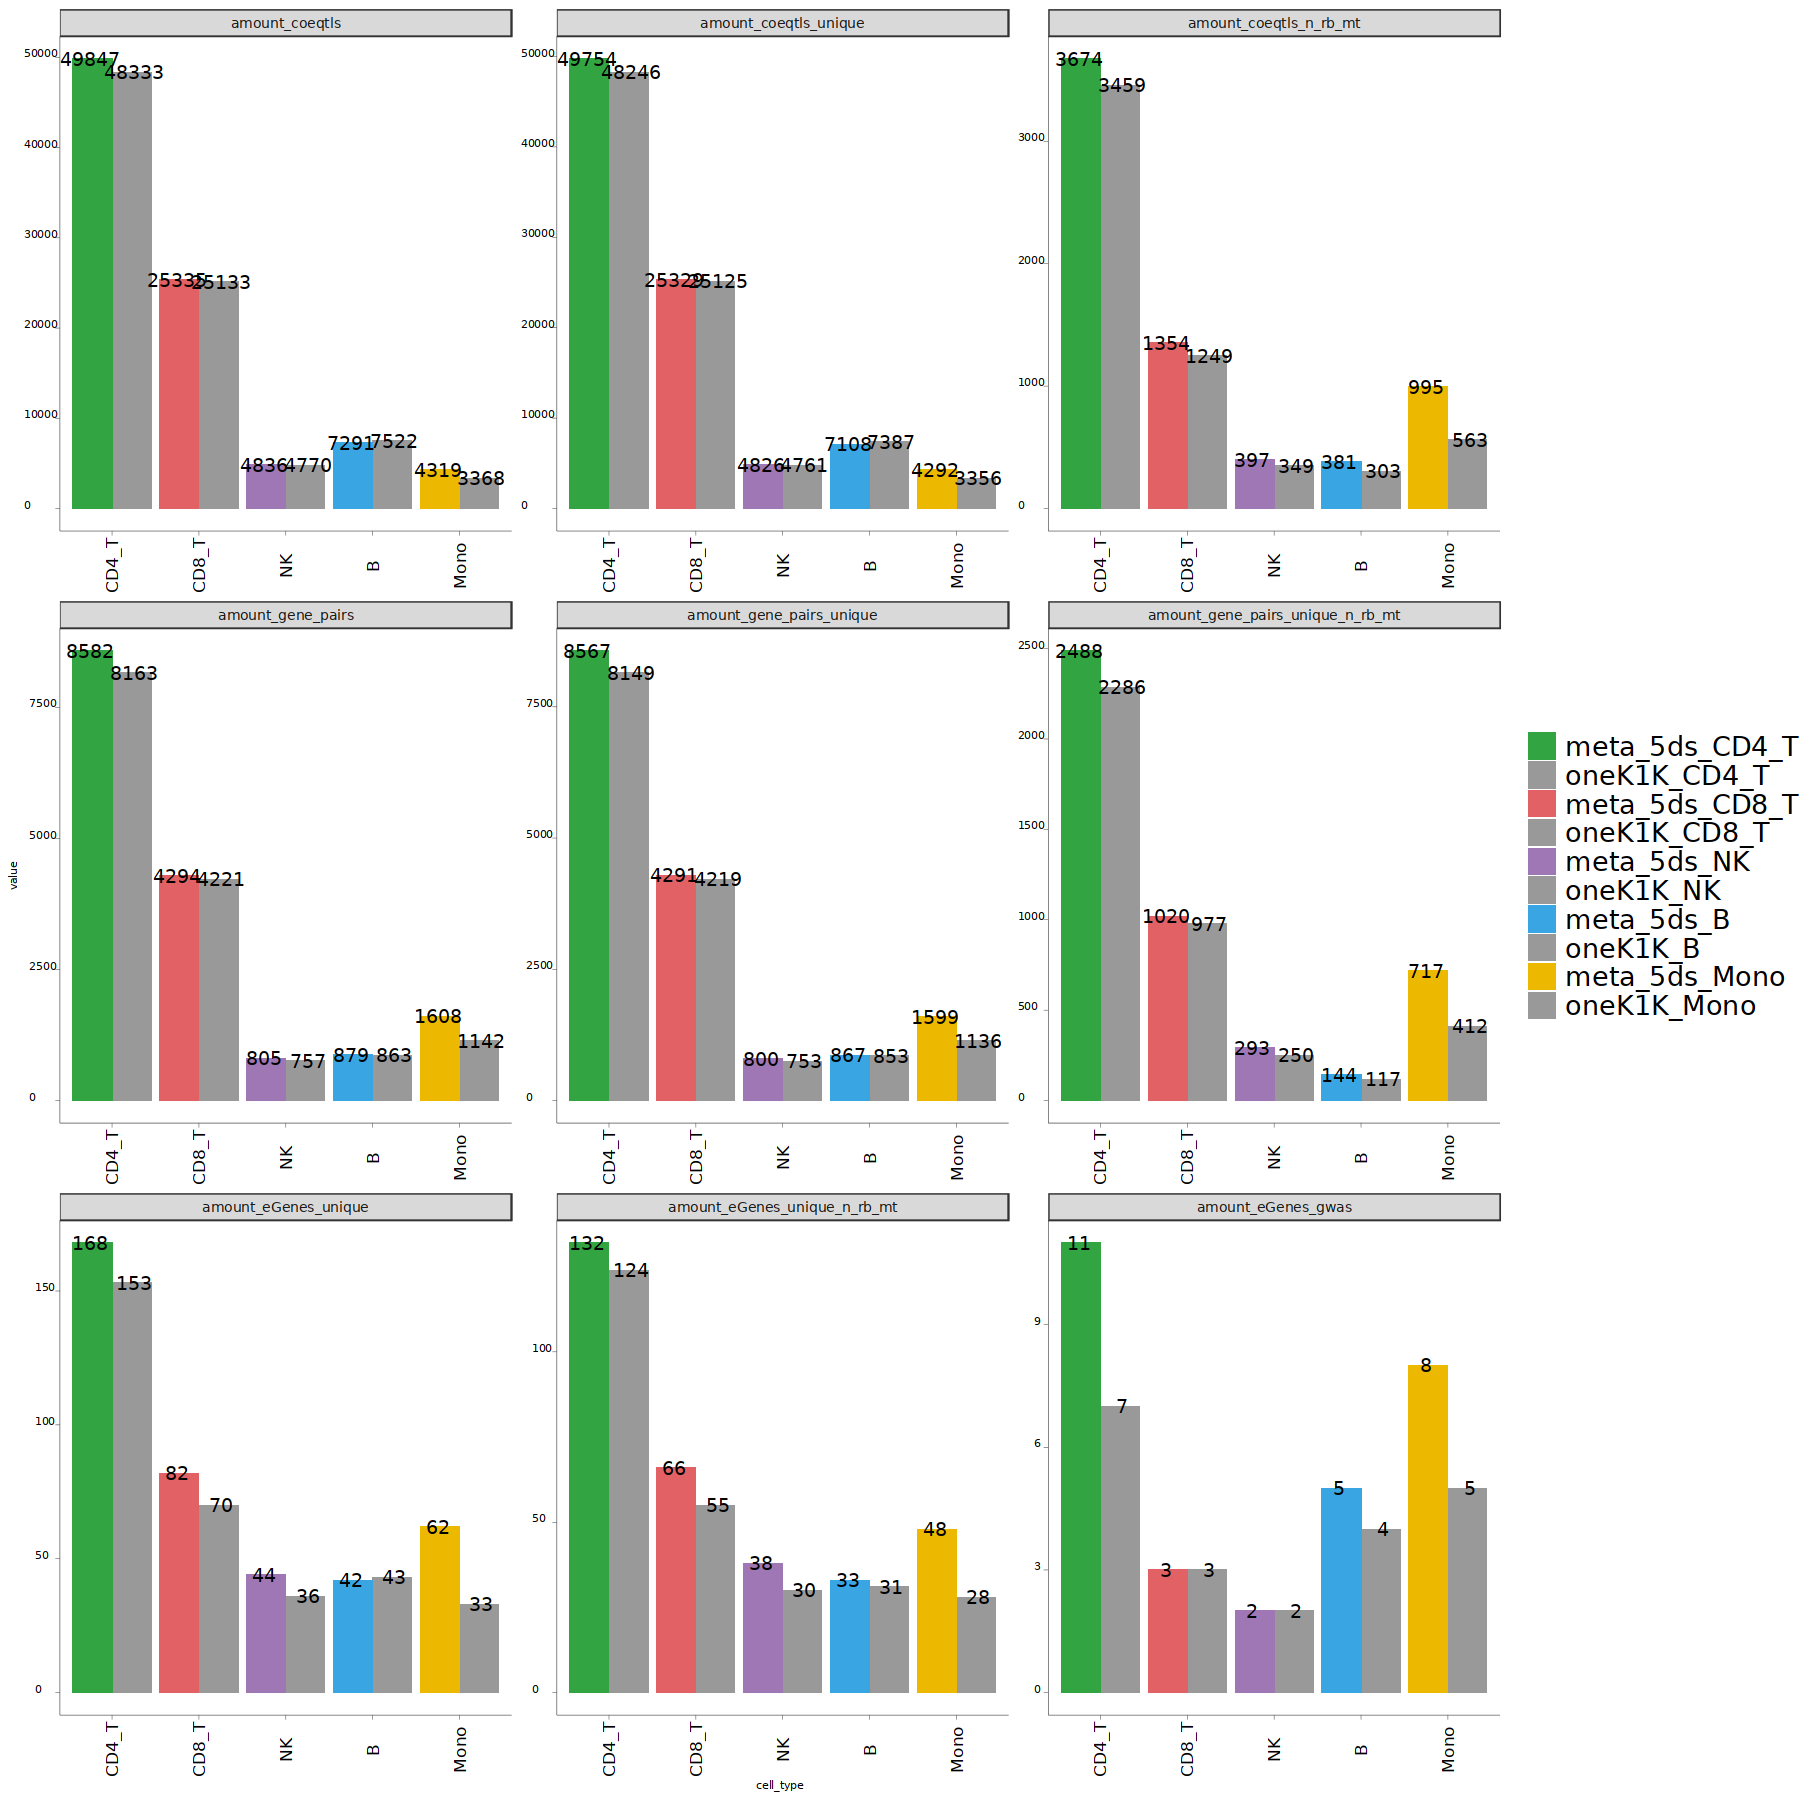

In [196]:
options(repr.plot.width=15, repr.plot.height=15)
ggplot(summary_long[summary_long$dataset %in% c('meta_5ds', 'oneK1K'),], aes(x=cell_type, y=value, fill = fill_value)) +  facet_wrap(~variable, scales = 'free') +
  geom_bar(stat = "identity", position = "dodge") +  plot_config + scale_fill_manual(values =  c("meta_5ds_CD4_T" = "#32a542", "meta_5ds_CD8_T"="#e26164", "meta_5ds_NK" = "#9e77b4", "meta_5ds_B" = "#39a6e3", "meta_5ds_Mono" = "#edb800",
                                                                                                 "oneK1K_CD4_T" = "#999999", "oneK1K_CD8_T"="#999999", "oneK1K_NK" = "#999999", "oneK1K_B" = "#999999", "oneK1K_Mono" = "#999999"                                             
                                                                                                
                                                                                                )) + 
  theme(text = element_text (size = 20), axis.text.x = element_text(angle = 90, size = 10)) +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0.5)

In [209]:
### Plots specific for supplement

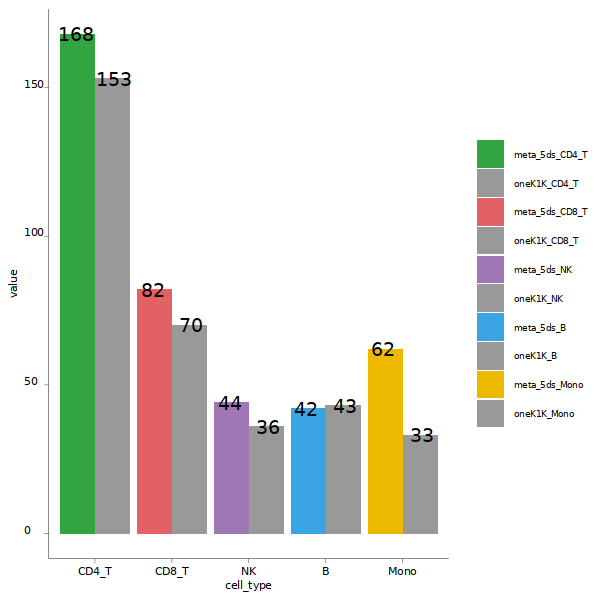

In [210]:
options(repr.plot.width=5, repr.plot.height=5)
egene_plot =ggplot(summary_long[(summary_long$dataset %in% c('meta_5ds', 'oneK1K')) & (summary_long$variable == 'amount_eGenes_unique'),], aes(x=cell_type, y=value, fill = fill_value)) +
  geom_bar(stat = "identity", position = "dodge") +  plot_config + scale_fill_manual(values =  c("meta_5ds_CD4_T" = "#32a542", "meta_5ds_CD8_T"="#e26164", "meta_5ds_NK" = "#9e77b4", "meta_5ds_B" = "#39a6e3", "meta_5ds_Mono" = "#edb800",
                                                                                                 "oneK1K_CD4_T" = "#999999", "oneK1K_CD8_T"="#999999", "oneK1K_NK" = "#999999", "oneK1K_B" = "#999999", "oneK1K_Mono" = "#999999"                                             
                                                                                                
                                                                                                ))  +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0.5)

egene_plot



In [211]:
pdf(paste0('figures/F9/F9_eGene_overview_oneK1K_vs_meta', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =4, height =2.5)
print(egene_plot)
dev.off()

pdf 
  2

In [212]:
### Plots specific for supplement

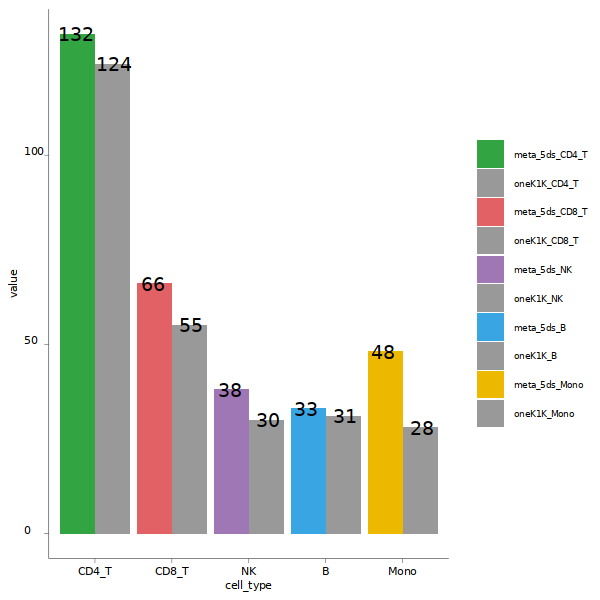

In [213]:
options(repr.plot.width=5, repr.plot.height=5)
egene_plot =ggplot(summary_long[(summary_long$dataset %in% c('meta_5ds', 'oneK1K')) & (summary_long$variable == 'amount_eGenes_unique_n_rb_mt'),], aes(x=cell_type, y=value, fill = fill_value)) +
  geom_bar(stat = "identity", position = "dodge") +  plot_config + scale_fill_manual(values =  c("meta_5ds_CD4_T" = "#32a542", "meta_5ds_CD8_T"="#e26164", "meta_5ds_NK" = "#9e77b4", "meta_5ds_B" = "#39a6e3", "meta_5ds_Mono" = "#edb800",
                                                                                                 "oneK1K_CD4_T" = "#999999", "oneK1K_CD8_T"="#999999", "oneK1K_NK" = "#999999", "oneK1K_B" = "#999999", "oneK1K_Mono" = "#999999"                                             
                                                                                                
                                                                                                ))  +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0.5)

egene_plot



In [214]:
pdf(paste0('figures/F9/F9_eGene_nrb_mt_overview_oneK1K_vs_meta', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =4, height =2.5)
print(egene_plot)
dev.off()

pdf 
  2

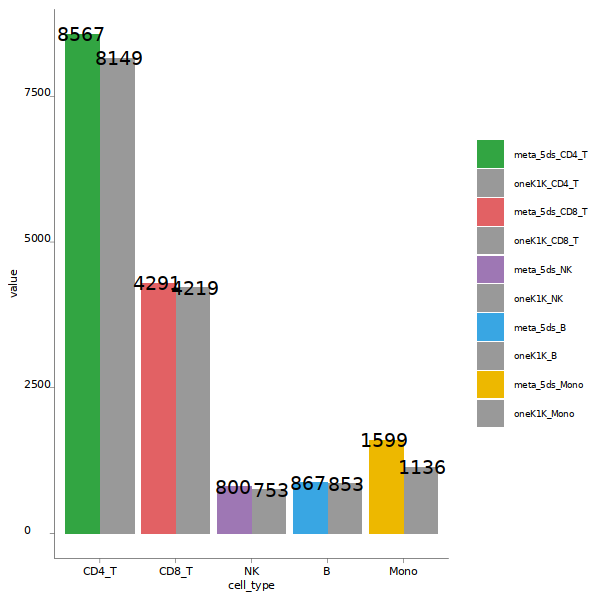

In [217]:
options(repr.plot.width=5, repr.plot.height=5)
gene_pair_plot =ggplot(summary_long[(summary_long$dataset %in% c('meta_5ds', 'oneK1K')) & (summary_long$variable == 'amount_gene_pairs_unique'),], aes(x=cell_type, y=value, fill = fill_value)) +
  geom_bar(stat = "identity", position = "dodge") +  plot_config + scale_fill_manual(values =  c("meta_5ds_CD4_T" = "#32a542", "meta_5ds_CD8_T"="#e26164", "meta_5ds_NK" = "#9e77b4", "meta_5ds_B" = "#39a6e3", "meta_5ds_Mono" = "#edb800",
                                                                                                 "oneK1K_CD4_T" = "#999999", "oneK1K_CD8_T"="#999999", "oneK1K_NK" = "#999999", "oneK1K_B" = "#999999", "oneK1K_Mono" = "#999999"                                             
                                                                                                
                                                                                                ))  +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0.5)

egene_plot



In [218]:
pdf(paste0('figures/F9/F9_gene_pair_overview_oneK1K_vs_meta', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =4, height =2.5)
print(gene_pair_plot)
dev.off()

pdf 
  2

In [219]:
### Plots specific for supplement

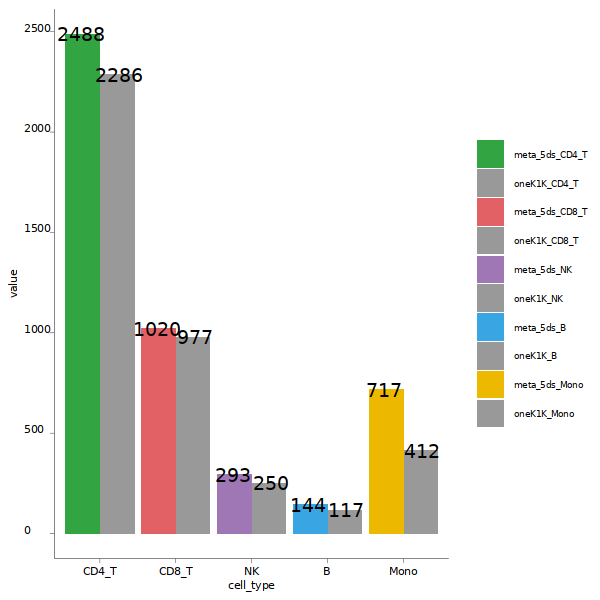

In [222]:
options(repr.plot.width=5, repr.plot.height=5)
gene_pair =ggplot(summary_long[(summary_long$dataset %in% c('meta_5ds', 'oneK1K')) & (summary_long$variable =='amount_gene_pairs_unique_n_rb_mt'),], aes(x=cell_type, y=value, fill = fill_value)) +
  geom_bar(stat = "identity", position = "dodge") +  plot_config + scale_fill_manual(values =  c("meta_5ds_CD4_T" = "#32a542", "meta_5ds_CD8_T"="#e26164", "meta_5ds_NK" = "#9e77b4", "meta_5ds_B" = "#39a6e3", "meta_5ds_Mono" = "#edb800",
                                                                                                 "oneK1K_CD4_T" = "#999999", "oneK1K_CD8_T"="#999999", "oneK1K_NK" = "#999999", "oneK1K_B" = "#999999", "oneK1K_Mono" = "#999999"                                             
                                                                                                
                                                                                                ))  +  geom_text(aes(label = value), position = position_dodge(width = 1), vjust = 0.5)

gene_pair



In [223]:
pdf(paste0('figures/F9/F9_gene_pair_nrb_mt_overview_oneK1K_vs_meta', '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =4, height =2.5)
print(gene_pair)
dev.off()

pdf 
  2

## Fig.2 / Fig.3 / Suppl.: Replication Plots

In [125]:
meta_results = meta_results

In [126]:
coeqtl_results = coeqtl_results

In [127]:
meta_results$dataset = 'meta_5ds'

In [128]:
head(meta_results,2)

,V1,eGene,coeGene,snp_id,cell_type,feature_id,triplet,n_samples,p_value,z_score,⋯,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl,simulation_score,ccInteraction,dataset
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<int>,<chr>
1,1,A2M,BACH2,12:8971336:T:C,CD4_T,A2M_BACH2,12:8971336:T:C;A2M_BACH2,977,2.687871e-11,-6.662730,⋯,NA,NA,NA,NA,NA,NA,,0,0,meta_5ds
2,2,A2M,BACH2,12:8992460:T:C,CD4_T,A2M_BACH2,12:8992460:T:C;A2M_BACH2,977,1.680350e-10,-6.388031,⋯,NA,NA,NA,NA,NA,NA,,0,0,meta_5ds


In [129]:
head(coeqtl_results,2)

V1,eGene,coeGene,snp_id,dataset,cell_type,triplet,feature_id,n_samples,p_val_mt,⋯,eGene_mean_amount_cells,eGene_mean_expression,eGene_mean_percentage_zero,eGene_mean_non_zero_counts,coeGene_amount_samples_non_zero,coeGene_mean_amount_cells,coeGene_mean_expression,coeGene_mean_percentage_zero,coeGene_mean_non_zero_counts,remap_overlap_tf_snp
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A2M,BACH2,12:8971336:T:C,oneK1K,CD4_T,12:8971336:T:C;A2M_BACH2,A2M_BACH2,855,0.0795440,⋯,494.7441,0.06395932,94.40685,26.23128,1017,472.9774,1.45206,39.81886,290.2085,NA
2,A2M,BACH2,12:8992460:T:C,oneK1K,CD4_T,12:8992460:T:C;A2M_BACH2,A2M_BACH2,855,0.4565702,⋯,494.7441,0.06395932,94.40685,26.23128,1017,472.9774,1.45206,39.81886,290.2085,NA


### In between dataset comparison:  oneK1K vs. Rest

In [ ]:
##### Gene-Pair Level (max per gene-pair)

In [4]:
### Replication of oneK1K sign co-eQTLs In the other datasets (per cell-type dataset) and meta-results

In [131]:
coeqtl_results = data.frame(coeqtl_results)

In [252]:
dataset = 'oneK1K'   # only for oneK1K in the other datasets

In [253]:
thres = 0.05

In [254]:
replication_info = data.frame()
replication_info_scatter = data.frame()

In [ ]:
### Generate data and scatterplot figures for replication

In [255]:
for(i in unique (coeqtl_results$cell_type)){
    # cell_type = 'NK'   # TBD: iterate over cell-types
    cell_type = i
    
    analysis = coeqtl_results[(coeqtl_results$dataset == dataset) & (coeqtl_results$cell_type == cell_type),]
    
     ### Select the minimum p-value per gene-pair
    set.seed(1)
    analysis = analysis[analysis$type == 'unique',] %>% group_by( cell_type, feature_id, dataset) %>% dplyr::filter(p_value == min(p_value)) %>% slice_sample(n =1)
    
    ## Merge the tests to the analysis
    analysis = merge(analysis, rbind(unique(tests_on_results[,c('cell_type', 'dataset', 'triplet', 'z_score')]),
                       unique(tests_on_results_meta[,c('cell_type', 'dataset', 'triplet', 'z_score')])), by = c('cell_type', 'triplet'))
    
    replication_info_scatter  = rbind(replication_info_scatter , analysis)
    ### Save the scatter plot data
    
    ### Calculate the correlation of the replication
    replication_values = unique(analysis) %>% group_by(cell_type , dataset.x, dataset.y) %>% summarise(amount_mapped_triplets = length(unique(triplet)),
                                                                                       amount_nominal_sign = sum(p_value < thres),
                                                                                      # amount_adj_q_sign = sum(q_val.y < thres),
                                                                                       #amount_q_sign_diff_dir = sum((q_val.y < thres) & ((beta.x < 0)) != (beta.y < 0)),
                                                                                       amount_bonf_sign = sum(p_val_mt < thres),
                                                                                       cor_pearson = cor(z_score.x, z_score.y),
                                                                                       
                                                                                       amount_mapped_triplets_nrb_mt = length(unique(triplet[(eGene_rib == 0) &(coeGene_rib ==0) & (eGene_mt == 0) & (coeGene_mt == 0)])),
                                                                                       cor_pearson_nrb_mt = cor(z_score.x[(eGene_rib == 0) &(coeGene_rib ==0) & (eGene_mt == 0) & (coeGene_mt == 0)],
                                                                                                                z_score.y[(eGene_rib == 0) &(coeGene_rib ==0) & (eGene_mt == 0) & (coeGene_mt == 0)], use = 'complete.obs')
                    
                                                                                      
                                                                                      )
    
    replication_info = rbind(replication_info, replication_values)
    
    ### Do the plots (all triplets)

    replication_plot_triplet = ggplot(unique(analysis), aes(x = z_score.x, y=z_score.y)) +
      geom_point(size=1) + facet_wrap(dataset.x  + dataset.y  + cell_type~., nrow = 1) + stat_cor(method = 'pearson', size =7)  + theme(text = element_text(size = 25)) + plot_config + geom_hline(yintercept = 0) + geom_vline(xintercept = 0) #+ ylim(c(-0.8,0.8)) + xlim(c(-0.8,0.8))


    #replication_plot_triplet

    pdf(paste0('figures/F9/F9_Replication_Dataset', dataset, '_', cell_type, '_' ,  n_sample_filter, '_', p_val_column ,'.pdf'), width =length(unique(analysis$dataset.y)) * 7, height =7)
    print(replication_plot_triplet)
    dev.off()
    
    ### Do the plots (non ribosomal/ mitochondrial)

    replication_plot_triplet = ggplot(unique(analysis[(analysis$eGene_rib == 0) & (analysis$coeGene_rib == 0) & (analysis$eGene_mt == 0) & (analysis$coeGene_mt == 0),]), aes(x = z_score.x, y=z_score.y)) +
      geom_point(size=1) + facet_wrap(dataset.x  + dataset.y  + cell_type~., nrow = 1) + stat_cor(method = 'pearson', size =7)  + theme(text = element_text(size = 25)) + plot_config + geom_hline(yintercept = 0) + geom_vline(xintercept = 0) #+ ylim(c(-0.8,0.8)) + xlim(c(-0.8,0.8))


    #replication_plot_triplet

    pdf(paste0('figures/F9/F9_Replication_Dataset_nrb_mt', dataset, '_', cell_type, '_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =length(unique(analysis$dataset.y)) * 7, height =7)
    print(replication_plot_triplet)
    dev.off()
    
    }
    

    
    
    
    

`summarise()` has grouped output by 'cell_type', 'dataset.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'cell_type', 'dataset.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'cell_type', 'dataset.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'cell_type', 'dataset.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'cell_type', 'dataset.x'. You can override
using the `.groups` argument.


In [256]:
head(replication_info_scatter ,2)

,cell_type,triplet,V1,eGene,coeGene,snp_id,dataset.x,feature_id,n_samples,p_val_mt,⋯,eGene_mean_percentage_zero,eGene_mean_non_zero_counts,coeGene_amount_samples_non_zero,coeGene_mean_amount_cells,coeGene_mean_expression,coeGene_mean_percentage_zero,coeGene_mean_non_zero_counts,remap_overlap_tf_snp,dataset.y,z_score.y
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,CD4_T,1:111226769:C:T;ATXN1_CHI3L2,1698,CHI3L2,ATXN1,1:111226769:C:T,oneK1K,ATXN1_CHI3L2,573,3.80045,⋯,95.88931,21.18442,1017,472.9774,0.6219299,63.31871,167.9272,NA,meta_analysis,5.648893
2,CD4_T,1:111226769:C:T;ATXN1_CHI3L2,1698,CHI3L2,ATXN1,1:111226769:C:T,oneK1K,ATXN1_CHI3L2,573,3.80045,⋯,95.88931,21.18442,1017,472.9774,0.6219299,63.31871,167.9272,NA,oneK1K,5.648893


In [257]:
dim(replication_info_scatter )

[1] 65036    37

In [258]:
replication_info_scatter = replication_info_scatter[replication_info_scatter$dataset.y != 'meta_analysis',]

In [259]:
### Save the data used for scatter plots

In [260]:
unique(replication_info_scatter$dataset.x)

[1] "oneK1K"

In [261]:
unique(replication_info_scatter$dataset.y)

[1] "oneK1K"    "Franke_v2" "multiome"  "wijst"     "Franke_v3"

In [262]:
write.csv(replication_info_scatter, paste0('figures/F9/F9_Replication_Scatter_', dataset, '_',  n_sample_filter, '_', p_val_column , '_data.csv'))

In [263]:
replication_info = replication_info[replication_info$dataset.y != 'meta_analysis',]

In [264]:
unique(replication_info$dataset.y)

[1] "Franke_v2" "Franke_v3" "multiome"  "oneK1K"    "wijst"

In [265]:
head(replication_info,2)

cell_type,dataset.x,dataset.y,amount_mapped_triplets,amount_nominal_sign,amount_bonf_sign,cor_pearson,amount_mapped_triplets_nrb_mt,cor_pearson_nrb_mt
<chr>,<chr>,<chr>,<int>,<int>,<int>,"<dbl[,1]>",<int>,"<dbl[,1]>"
CD4_T,oneK1K,Franke_v2,3545,3545,2321,0.7461269,1180,0.4458324
CD4_T,oneK1K,Franke_v3,4601,4601,2876,0.6866404,1707,0.4567827


In [266]:
### Save the replication info
write.csv(replication_info, paste0( "../data/current/coeqtl_mapping/", coeqtl_results_path , "/shared_results/", 'DS_Replication_oneK1K_', n_sample_filter, '_', p_val_column ,'.csv'))

In [267]:
### Heatmap of the replication values

In [268]:
## all triplets

In [269]:
replication_info$cell_type <- factor(replication_info$cell_type, 
                                     levels = c("CD4_T", "CD8_T", "NK", "B", "Mono"))

In [270]:
nrow(replication_info)

[1] 25

In [271]:
## join information about n_samples and cells
replication_info = merge(replication_info, sample_summary_stats, by.x = c('cell_type', 'dataset.y'), by.y = c('cell_type', 'dataset'), all.x = TRUE)
nrow(replication_info)

[1] 25

In [272]:
replication_info$dataset.y.name = paste0(replication_info$dataset.y, "\n" , '(' ,replication_info$amount_individuals, ')')

In [273]:
head(replication_info,2)

,cell_type,dataset.y,dataset.x,amount_mapped_triplets,amount_nominal_sign,amount_bonf_sign,cor_pearson,amount_mapped_triplets_nrb_mt,cor_pearson_nrb_mt,mean_amount_cells,sum_amount_cells,sd_amount_cells,amount_individuals,dataset.y.name
,<fct>,<chr>,<chr>,<int>,<int>,<int>,"<dbl[,1]>",<int>,"<dbl[,1]>",<dbl>,<int>,<dbl>,<dbl>,<chr>
1,B,Franke_v2,oneK1K,197,197,144,0.4040949,27,0.09399378,18.15000,1815,13.90761,101,Franke_v2 (101)
2,B,Franke_v3,oneK1K,215,215,160,0.4535583,38,0.28269778,31.82051,1241,27.10979,47,Franke_v3 (47)


In [274]:
replication_info$cell_type <- factor(replication_info$cell_type, 
                                     levels = c("CD4_T", "CD8_T", "NK", "B", "Mono"))

In [275]:
replication_info$cor_label = round(replication_info$cor_pearson, 2)
replication_info$cor_label[replication_info$dataset.y == 'oneK1K'] = ''

In [276]:
replication_info$cor_pearson[replication_info$dataset.y == 'oneK1K'] = 0

In [277]:
head(replication_info,2)

,cell_type,dataset.y,dataset.x,amount_mapped_triplets,amount_nominal_sign,amount_bonf_sign,cor_pearson,amount_mapped_triplets_nrb_mt,cor_pearson_nrb_mt,mean_amount_cells,sum_amount_cells,sd_amount_cells,amount_individuals,dataset.y.name,cor_label
,<fct>,<chr>,<chr>,<int>,<int>,<int>,"<dbl[,1]>",<int>,"<dbl[,1]>",<dbl>,<int>,<dbl>,<dbl>,<chr>,"<chr[,1]>"
1,B,Franke_v2,oneK1K,197,197,144,0.4040949,27,0.09399378,18.15000,1815,13.90761,101,Franke_v2 (101),0.4
2,B,Franke_v3,oneK1K,215,215,160,0.4535583,38,0.28269778,31.82051,1241,27.10979,47,Franke_v3 (47),0.45


In [278]:
unique(replication_info$amount_individuals)

[1]  101   47  123 1018   41

pdf 
  2

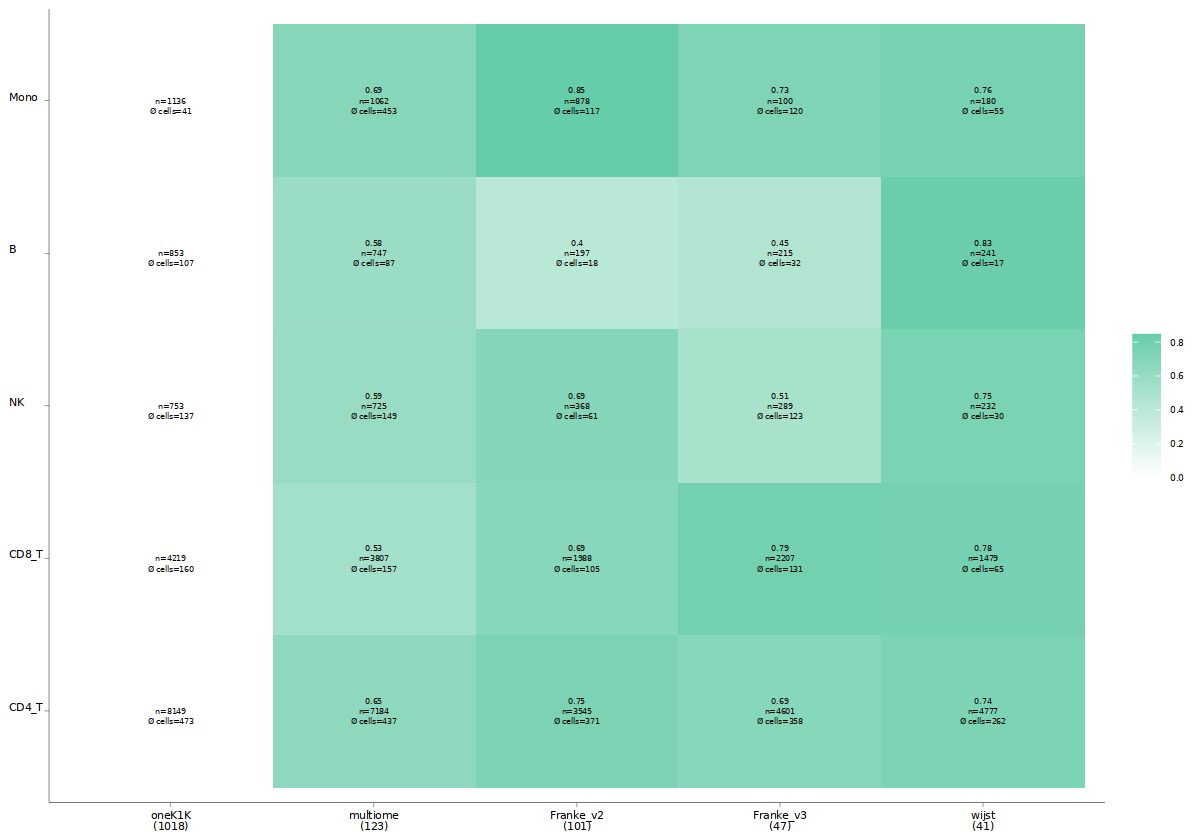

In [291]:
options(repr.plot.width=10, repr.plot.height=7)
replication_heatmap = ggplot(replication_info, aes(reorder(dataset.y.name, -amount_individuals), cell_type, fill=cor_pearson)) + 
  geom_tile() +
  scale_fill_gradient2(mid="white", high="aquamarine3", midpoint = 0, low = 'red') + geom_text(aes(label =  paste0(cor_label, "\n", "n=", amount_mapped_triplets, "\n", "Ø cells=",round(mean_amount_cells,0) )), size = 1.5, color = "black")  + plot_config + theme(axis.title.x = element_blank(), axis.title.y = element_blank())

replication_heatmap

pdf(paste0('figures/F9/F9_Replication_Heatmap_', dataset, '_',  n_sample_filter, '_', p_val_column , '.pdf'), width =3.6, height =3)
print(replication_heatmap)
dev.off()

In [292]:
#### For non-ribosomal and mitochondrial genes

In [293]:
replication_info$cor_label_nrb_mt = round(replication_info$cor_pearson_nrb_mt, 2)
replication_info$cor_label_nrb_mt[replication_info$dataset.y == 'oneK1K'] = ''

In [294]:
replication_info$cor_pearson_nrb_mt[replication_info$dataset.y == 'oneK1K'] = 0

pdf 
  2

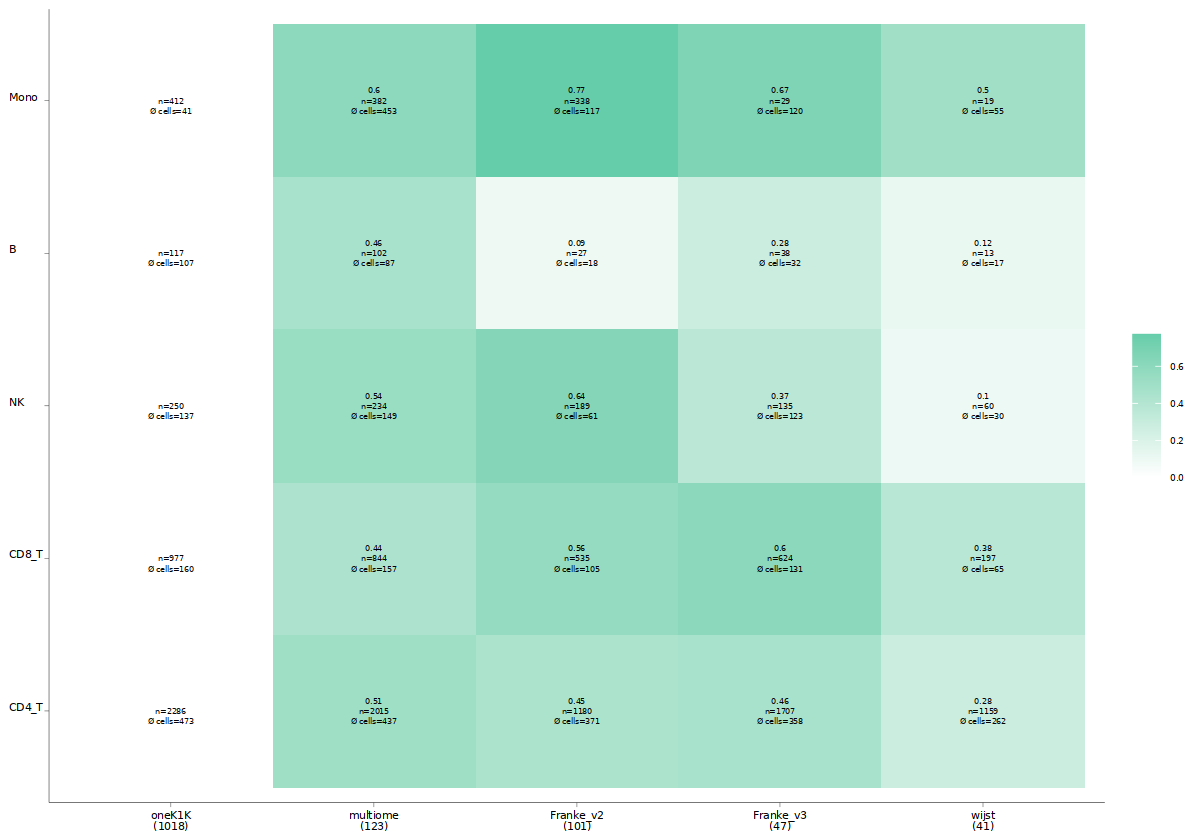

In [295]:
options(repr.plot.width=10, repr.plot.height=7)
replication_heatmap_nrb_mt =ggplot(replication_info, aes(reorder(dataset.y.name, -amount_individuals), cell_type, fill=cor_pearson_nrb_mt)) + 
  geom_tile() +
  scale_fill_gradient2(mid="white", high="aquamarine3", midpoint = 0, low = 'red') + geom_text(aes(label =  paste0(cor_label_nrb_mt, "\n", "n=", amount_mapped_triplets_nrb_mt, "\n", "Ø cells=",round(mean_amount_cells,0) )), size = 1.5, color = "black")  + plot_config + theme(axis.title.x = element_blank(), axis.title.y = element_blank())
replication_heatmap_nrb_mt

pdf(paste0('figures/F9/F9_Replication_Heatmap_nrb_mt_', dataset, '_',  n_sample_filter, '_', p_val_column , '.pdf'), width =3.6, height =3)
print(replication_heatmap_nrb_mt )
dev.off()

In [338]:
### Save the data for the correlation heatmaps

In [339]:
head(replication_info,2)

,cell_type,dataset.y,dataset.x,amount_mapped_triplets,amount_nominal_sign,amount_bonf_sign,cor_pearson,amount_mapped_triplets_nrb_mt,cor_pearson_nrb_mt,mean_amount_cells,amount_individuals,dataset.y.name,cor_label,cor_label_nrb_mt
,<fct>,<chr>,<chr>,<int>,<int>,<int>,"<dbl[,1]>",<int>,"<dbl[,1]>",<dbl>,<dbl>,<chr>,"<chr[,1]>","<chr[,1]>"
1,B,Franke_v2,oneK1K,197,197,144,0.4040949,27,0.09399378,18.15000,101,Franke_v2 (101),0.4,0.09
2,B,Franke_v3,oneK1K,215,215,160,0.4535583,38,0.28269778,31.82051,47,Franke_v3 (47),0.45,0.28


In [340]:
write.csv(replication_info, paste0('figures/F9/F9_Replication_Heatmap_nrb_mt_', dataset, '_',  n_sample_filter, '_', p_val_column , '_data.csv'))

### Cell-type comparison: Meta- analysis results

In [385]:
### In the other datasets (per cell-type dataset) and meta-results

In [386]:
dataset = 'meta_5ds'   # only for oneK1K in the other datasets

In [387]:
tests_on_results_meta$dataset = 'meta_5ds'

In [388]:
sample_summary_stats$dataset = str_replace(sample_summary_stats$dataset, 'meta_analysis', 'meta_5ds')

In [389]:
thres = 0.05

In [390]:
replication_info = data.frame()

In [391]:
i

[1] "B"

In [5]:
##### Gene-Pair Level (max per gene-pair)

In [137]:
### In the other datasets (per cell-type dataset) and meta-results

In [138]:
dataset = 'meta_5ds'   # only for oneK1K in the other datasets

In [139]:
tests_on_results_meta$dataset = 'meta_5ds'

In [140]:
thres = 0.05

In [141]:
replication_info = data.frame()

In [148]:
meta_results$cell_type  = factor(meta_results$cell_type , levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))

In [149]:
for(i in unique (meta_results$cell_type)){
    # cell_type = 'NK'   # TBD: iterate over cell-types
    cell_type = i
    
    analysis = meta_results[(meta_results$dataset == dataset) & (meta_results$cell_type == cell_type),]
    #analysis = analysis[analysis$type == 'unique',]
    
    ### Select the minimum p-value per gene-pair
    set.seed(1)
    analysis = analysis[analysis$type == 'unique',] %>% group_by( cell_type, feature_id, dataset) %>% dplyr::filter(p_value == min(p_value)) %>% slice_sample(n =1)
    
    ## Merge the tests to the analysis
    analysis = merge(analysis, rbind(unique(tests_on_results[,c('cell_type', 'dataset', 'triplet', 'z_score')]),
                       unique(tests_on_results_meta[,c('cell_type', 'dataset', 'triplet', 'z_score')])), by = c('dataset', 'triplet'))
    analysis$cell_type.x = factor(analysis$cell_type.x , levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))
    analysis$cell_type.y = factor(analysis$cell_type.y , levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))
    
    ### Calculate the correlation of the replication
    replication_values = unique(analysis) %>% group_by(dataset , cell_type.x, cell_type.y) %>% summarise(amount_mapped_triplets = length(unique(feature_id)),
                                                                                       amount_nominal_sign = sum(p_value < thres),
                                                                                      # amount_adj_q_sign = sum(q_val.y < thres),
                                                                                       #amount_q_sign_diff_dir = sum((q_val.y < thres) & ((beta.x < 0)) != (beta.y < 0)),
                                                                                       #amount_bonf_sign = sum(p_val_mt < thres),
                                                                                       cor_pearson = cor(z_score.x, z_score.y),
                                                                                       
                                                                                       amount_mapped_triplets_nrb_mt = length(unique(feature_id[(eGene_rib == 0) &(coeGene_rib ==0) & (eGene_mt == 0) & (coeGene_mt == 0) & (type == 'unique')])),
                                                                                       cor_pearson_nrb_mt = cor(z_score.x[(eGene_rib == 0) &(coeGene_rib ==0) & (eGene_mt == 0) & (coeGene_mt == 0) & (type == 'unique')],
                                                                                                                z_score.y[(eGene_rib == 0) &(coeGene_rib ==0) & (eGene_mt == 0) & (coeGene_mt == 0) & (type == 'unique')], use = 'complete.obs')
                    
                                                                                      
                                                                                      )
    
    replication_info = rbind(replication_info, replication_values)
    
    ### Save the scatterplot data
    analysis$identification_cell_type = i 
    write.csv(unique(analysis[  (analysis$cell_type.y != cell_type),c('dataset' , 'feature_id',  'cell_type.x', 'z_score.x',  'cell_type.y', 'z_score.y','eGene_rib', 'coeGene_rib', 'eGene_mt','coeGene_mt', 'type'  )]), paste0('figures/F9/F9_Gene_Pair_Replication_Cell_Type', dataset, '_', cell_type, '_scatter_data.csv'))
    
    ### Do the plots (all triplets)

    replication_plot_triplet = ggplot(unique(analysis[(analysis$cell_type.y != cell_type),]), aes(x = z_score.x, y=z_score.y)) + xlab(paste0 ('Z-score ', i)) + ylab('Z-score replication cell-type') +
      geom_point(size=0.1) + facet_wrap( cell_type.y ~., nrow = 1, scales = 'free') + stat_cor(method = 'pearson', size =2)  + plot_config + geom_hline(yintercept = 0) + geom_vline(xintercept = 0) +  xlab(paste0 ('Z-score ', i)) + ylab('Z-score replication cell-type')+
      ylim(c(- max(abs(unique(analysis$z_score.y[(analysis$cell_type.y != cell_type)]))), max(abs(unique(analysis$z_score.y[(analysis$cell_type.y != cell_type)]))))) + 
      xlim(c(- max(abs(unique(analysis$z_score.x[(analysis$cell_type.y != cell_type)]))), max(abs(unique(analysis$z_score.x[(analysis$cell_type.y != cell_type)])))))


    #replication_plot_triplet

    pdf(paste0('figures/F9/F9_Gene_Pair_Replication_Cell_Type', dataset, '_', cell_type, '_' ,  n_sample_filter, '_', p_val_column ,'.pdf'), width =8 , height =2.2)
    print(replication_plot_triplet)
    dev.off()
    
    ### Do the plots (non ribosomal/ mitochondrial)

    replication_plot_triplet = ggplot(unique(analysis[(analysis$eGene_rib == 0) & (analysis$coeGene_rib == 0) & (analysis$eGene_mt == 0) & (analysis$coeGene_mt == 0)  & (!is.na(analysis$eGene_rib)) & (analysis$type == 'unique')  & (analysis$cell_type.y != cell_type),]), aes(x = z_score.x, y=z_score.y)) +
      geom_point(size=0.1) + facet_wrap(cell_type.y   ~., nrow = 1, scales = 'free') + stat_cor(method = 'pearson', size =2) + plot_config + geom_hline(yintercept = 0) + geom_vline(xintercept = 0) + xlab(paste0 ('Z-score ', i)) + ylab('Z-score replication cell-type')  + 
      ylim(c(- max(abs(unique(analysis$z_score.y[(analysis$eGene_rib == 0) & (analysis$coeGene_rib == 0) & (analysis$eGene_mt == 0) & (analysis$coeGene_mt == 0)  & (!is.na(analysis$eGene_rib)) & (analysis$type == 'unique')  & (analysis$cell_type.y != cell_type)]))), max(abs(unique(analysis$z_score.y[(analysis$eGene_rib == 0) & (analysis$coeGene_rib == 0) & (analysis$eGene_mt == 0) & (analysis$coeGene_mt == 0)  & (!is.na(analysis$eGene_rib)) & (analysis$type == 'unique')  & (analysis$cell_type.y != cell_type)]))))) + 
      xlim(c(- max(abs(unique(analysis$z_score.x[(analysis$eGene_rib == 0) & (analysis$coeGene_rib == 0) & (analysis$eGene_mt == 0) & (analysis$coeGene_mt == 0)  & (!is.na(analysis$eGene_rib)) & (analysis$type == 'unique')  & (analysis$cell_type.y != cell_type)]))), max(abs(unique(analysis$z_score.x[(analysis$eGene_rib == 0) & (analysis$coeGene_rib == 0) & (analysis$eGene_mt == 0) & (analysis$coeGene_mt == 0)  & (!is.na(analysis$eGene_rib)) & (analysis$type == 'unique')  & (analysis$cell_type.y != cell_type)])))))


    #replication_plot_triplet

    pdf(paste0('figures/F9/F9_Gene_Pair_Replication_Cell_Type_nrb_mt', dataset, '_', cell_type, '_' , n_sample_filter, '_', p_val_column , '.pdf'), width =8, height =2.2)
    print(replication_plot_triplet)
    dev.off()
    
    ### Save the data without ribosomal/ mitochondrial
    write.csv(unique(analysis[(analysis$eGene_rib == 0) & (analysis$coeGene_rib == 0) & (analysis$eGene_mt == 0) & (analysis$coeGene_mt == 0)  & (!is.na(analysis$eGene_rib)) & (analysis$type == 'unique') & (analysis$cell_type.y != cell_type),c('dataset' , 'feature_id', 'cell_type.x', 'z_score.x',  'cell_type.y', 'z_score.y','eGene_rib', 'coeGene_rib', 'eGene_mt','coeGene_mt', 'type'  )]), 
              paste0('figures/F9/F9_Gene_Pair_Replication_Cell_Type', dataset, '_', cell_type, 'nrb_mt_scatter_data.csv'))
    
    }
    

    
    
    
    

`summarise()` has grouped output by 'dataset', 'cell_type.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type.x'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type.x'. You can override
using the `.groups` argument.


In [430]:
#replication_info$dataset = str_replace(replication_info$dataset, 'meta_5ds', 'meta_analysis')

In [431]:
### Heatmap of the replication values

In [213]:
## all triplets

In [214]:
replication_info$cell_type.y <- factor(replication_info$cell_type.y, 
                                     levels = c("CD4_T", "CD8_T", "NK", "B", "Mono"))

In [215]:
replication_info$cell_type.x <- factor(replication_info$cell_type.x, 
                                     levels = c("CD4_T", "CD8_T", "NK", "B", "Mono"))

In [216]:
unique(replication_info$dataset)

[1] "meta_5ds"

In [217]:
unique(sample_summary_stats$dataset)

[1] "Franke_v2" "Franke_v3" "multiome"  "oneK1K"    "wijst"     "meta_5ds"

In [218]:
head(sample_summary_stats,2)

dataset,cell_type,mean_amount_cells,amount_individuals
<chr>,<chr>,<dbl>,<dbl>
Franke_v2,B,18.1500,101
Franke_v2,CD4_T,371.4653,101


In [219]:
## add information about amount of cells
nrow(replication_info)
replication_info = merge(replication_info, sample_summary_stats, by.x = c('cell_type.x', 'dataset') , by.y = c('cell_type', 'dataset'),all.x = TRUE)
nrow(replication_info)

[1] 25

[1] 25

In [220]:
replication_info$cell_type.x.name = paste0(replication_info$cell_type.x,  "\n", 'Ø cells= ', "\n",round(replication_info$mean_amount_cells, 0))

In [221]:
replication_info = unique(replication_info)

In [222]:
replication_info$cor_pearson_label = round(replication_info$cor_pearson,2)

In [223]:
replication_info$cor_pearson_label[replication_info$cell_type.x == replication_info$cell_type.y ] = ''

In [224]:
replication_info$cor_pearson_nrb_mt_label = round(replication_info$cor_pearson_nrb_mt,2)
replication_info$cor_pearson_nrb_mt_label[replication_info$cell_type.x == replication_info$cell_type.y ] = ''

In [225]:
head(replication_info,2)

,cell_type.x,dataset,cell_type.y,amount_mapped_triplets,amount_nominal_sign,amount_bonf_sign,cor_pearson,amount_mapped_triplets_nrb_mt,cor_pearson_nrb_mt,mean_amount_cells,amount_individuals,cell_type.x.name,cor_pearson_label,cor_pearson_nrb_mt_label
,<fct>,<chr>,<fct>,<int>,<int>,<int>,"<dbl[,1]>",<int>,"<dbl[,1]>",<dbl>,<dbl>,<chr>,"<chr[,1]>","<chr[,1]>"
1,B,meta_5ds,B,867,867,676,1.0000000,144,1.0000000,52.18829,1330,B Ø cells= 52,,
2,B,meta_5ds,CD4_T,599,599,497,0.8757566,53,0.7070004,52.18829,1330,B Ø cells= 52,0.88,0.71


pdf 
  2

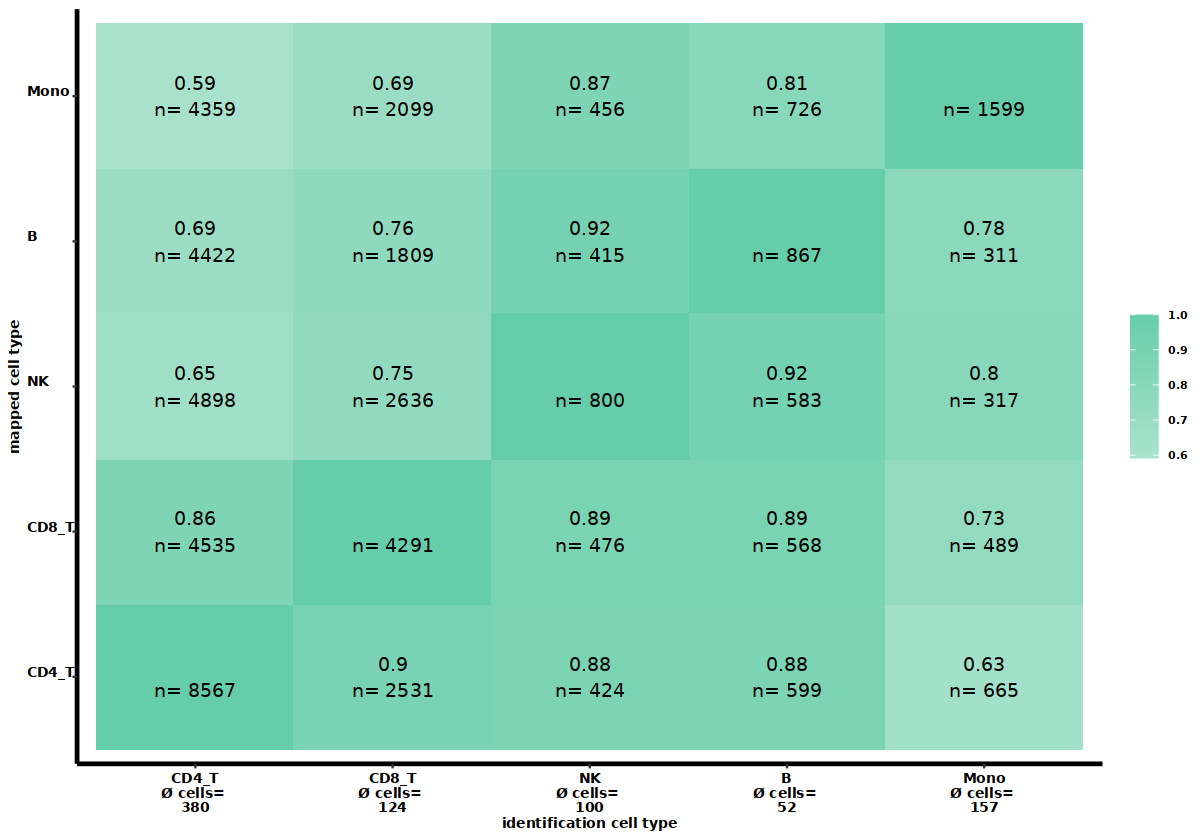

In [226]:
options(repr.plot.width=10, repr.plot.height=7)
replication_heatmap = ggplot(replication_info, aes( reorder(cell_type.x.name, as.numeric(cell_type.x)), cell_type.y, fill=cor_pearson)) + 
  geom_tile() +
  scale_fill_gradient2(mid="white", high="aquamarine3", midpoint = 0, low = 'red') + geom_text(aes(label =  paste0(cor_pearson_label, "\n", "n= ", amount_mapped_triplets)), color = "black") + theme(text = element_text(size=20), axis.text.x = element_text()) + xlab('identification cell type') + ylab('mapped cell type') + plot_config 

replication_heatmap

pdf(paste0('figures/F9/F9_Gene_Pair_Replication_Heatmap_CT', dataset, '_' ,  n_sample_filter, '_', p_val_column ,'.pdf'), width =7, height =6)
print(replication_heatmap)
dev.off()

pdf 
  2

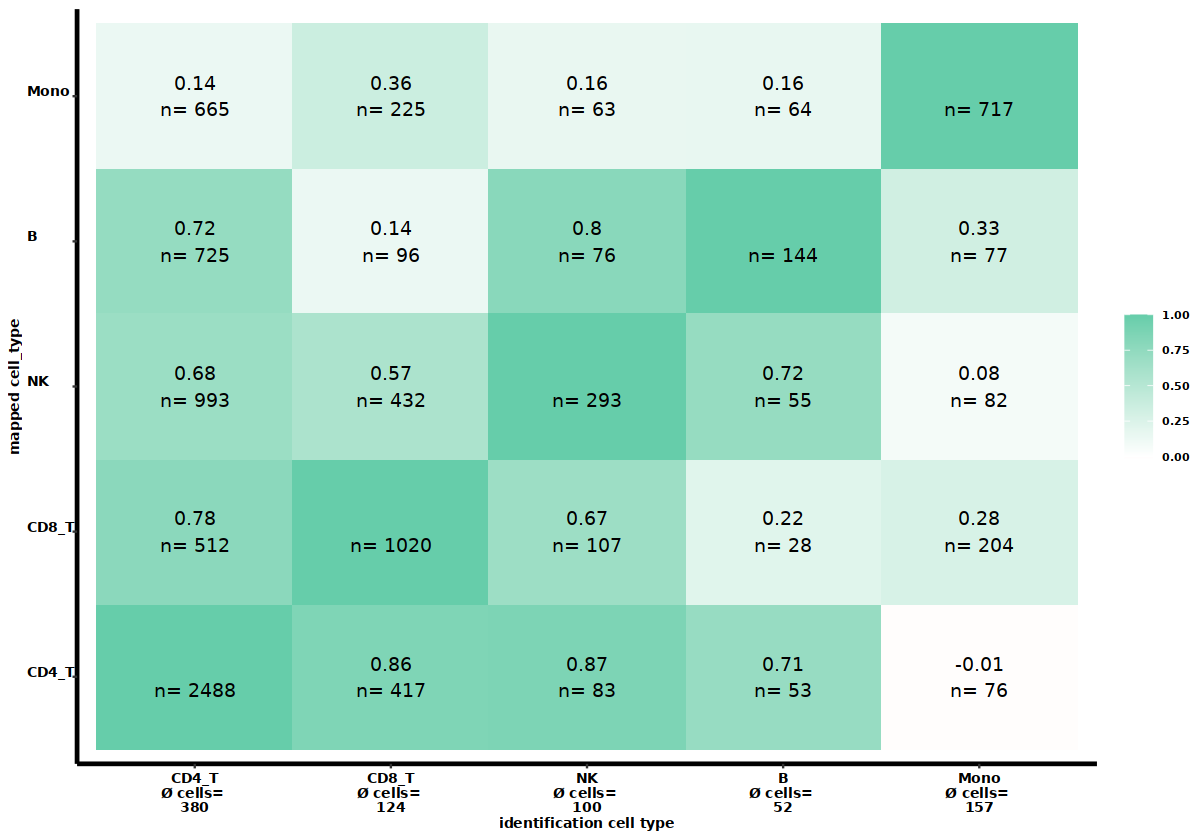

In [227]:
options(repr.plot.width=10, repr.plot.height=7)
replication_heatmap_nrb_mt = ggplot(replication_info, aes(reorder(cell_type.x.name, as.numeric(cell_type.x)), cell_type.y, fill=cor_pearson_nrb_mt)) + 
  geom_tile() +
  scale_fill_gradient2(mid="white", high="aquamarine3", midpoint = 0, low = 'red') + geom_text(aes(label =  paste0(cor_pearson_nrb_mt_label, "\n", "n= ", amount_mapped_triplets_nrb_mt)), color = "black") + 
  theme(text = element_text(size=20), axis.text.x = element_text()) + xlab('identification cell type') + ylab('mapped cell_type') + plot_config

replication_heatmap_nrb_mt 

pdf(paste0('figures/F9/F9_Replication_Heatmap_CT_nrb_mt_', dataset,'_' ,  n_sample_filter, '_', p_val_column , '.pdf'), width =7, height =6)
print(replication_heatmap_nrb_mt )
dev.off()

In [230]:
### Save the data for the heatmap

In [231]:
write.csv(replication_info, paste0('figures/F9/F9_Replication_Heatmap_CT_nrb_mt_', dataset,'_' ,  n_sample_filter, '_', p_val_column , '_data.csv'))